In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading data into dataframe

data1 = pd.read_csv("more.csv")
benign_urls = data1[data1['Label'] == 0]
phishing_urls = data1[data1['Label'] == 1]
random_benign_urls = benign_urls.sample(n=20000, random_state=42)
random_phishing_urls = phishing_urls.sample(n=20000, random_state=42)
sampled_dataset = pd.concat([random_benign_urls, random_phishing_urls])
data = sampled_dataset.sample(frac=1).reset_index(drop=True)
data.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,tobogo.net,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ptmoey.cloud,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,bafybeifps6lbmmuwbpetmhvx4wn54jmc2emwr7dvispgh...,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,cloudflare-ipfs.com,0,0,1,3,0,0,0,1,0,0,0,0,0,0,0,0,1
4,momoshop.com.tw,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
#Shape of dataframe

data.shape

(40000, 18)

In [4]:
#Information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         40000 non-null  object
 1   Have_IP        40000 non-null  int64 
 2   Have_At        40000 non-null  int64 
 3   URL_Length     40000 non-null  int64 
 4   URL_Depth      40000 non-null  int64 
 5   Redirection    40000 non-null  int64 
 6   https_Domain   40000 non-null  int64 
 7   TinyURL        40000 non-null  int64 
 8   Prefix/Suffix  40000 non-null  int64 
 9   DNS_Record     40000 non-null  int64 
 10  Web_Traffic    40000 non-null  int64 
 11  Domain_Age     40000 non-null  int64 
 12  Domain_End     40000 non-null  int64 
 13  iFrame         40000 non-null  int64 
 14  Mouse_Over     40000 non-null  int64 
 15  Right_Click    40000 non-null  int64 
 16  Web_Forwards   40000 non-null  int64 
 17  Label          40000 non-null  int64 
dtypes: int64(17), object(1)
me

In [5]:
# nunique value in columns

data.nunique()

Domain           13309
Have_IP              1
Have_At              2
URL_Length           2
URL_Depth           20
Redirection          2
https_Domain         2
TinyURL              2
Prefix/Suffix        2
DNS_Record           1
Web_Traffic          1
Domain_Age           1
Domain_End           1
iFrame               1
Mouse_Over           1
Right_Click          1
Web_Forwards         1
Label                2
dtype: int64

In [6]:
#droping index column

data = data.drop(['Domain'],axis = 1)

In [7]:
#description of dataset

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Have_IP,40000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Have_At,40000.0,0.009100,0.094960,0.0,0.0,0.0,0.0,1.0
URL_Length,40000.0,0.713675,0.452049,0.0,0.0,1.0,1.0,1.0
URL_Depth,40000.0,2.257675,2.077050,0.0,1.0,2.0,3.0,32.0
Redirection,40000.0,0.011975,0.108775,0.0,0.0,0.0,0.0,1.0
https_Domain,40000.0,0.000275,0.016581,0.0,0.0,0.0,0.0,1.0
TinyURL,40000.0,0.056175,0.230262,0.0,0.0,0.0,0.0,1.0
Prefix/Suffix,40000.0,0.209500,0.406957,0.0,0.0,0.0,0.0,1.0
DNS_Record,40000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Web_Traffic,40000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


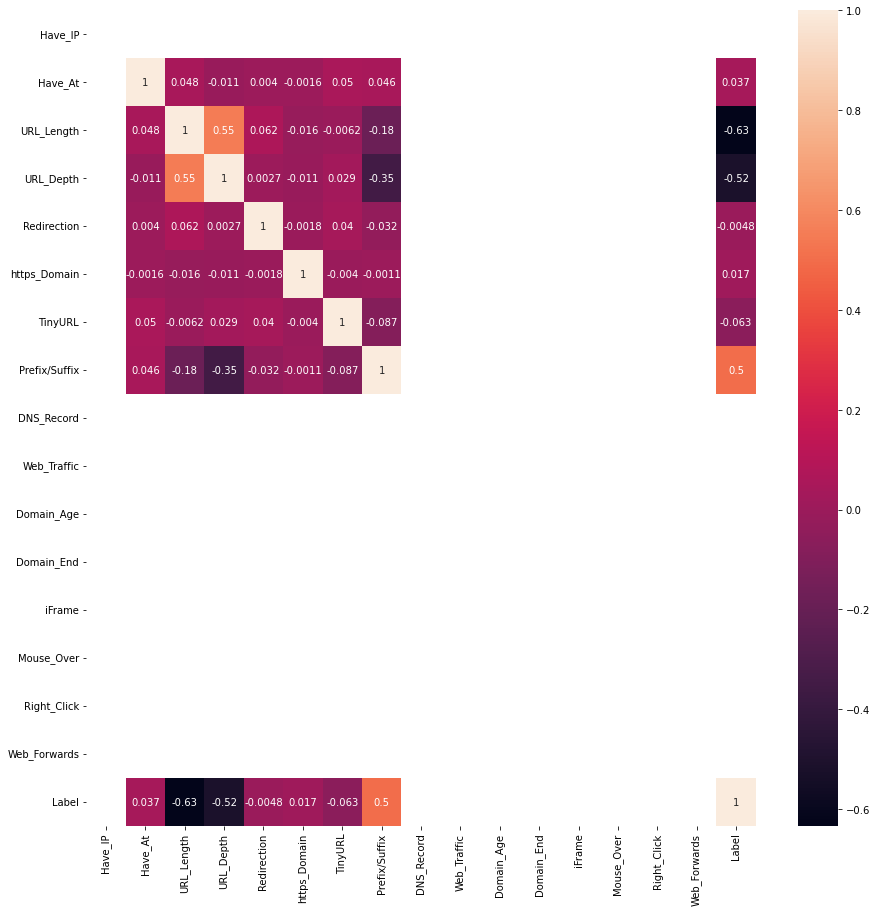

In [8]:
#Correlation heatmap

plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [9]:
print(data.columns)


Index(['Have_IP', 'Have_At', 'URL_Length', 'URL_Depth', 'Redirection',
       'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic',
       'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over', 'Right_Click',
       'Web_Forwards', 'Label'],
      dtype='object')


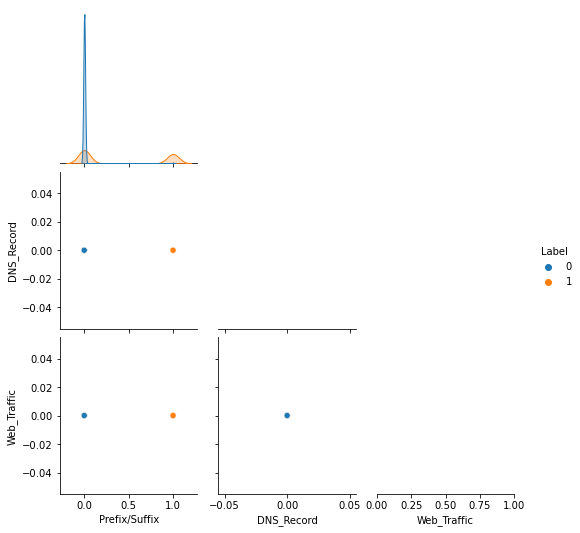

In [10]:
#pairplot for particular features

#df = data[['PrefixSuffix-', 'SubDomains', 'HTTPS','AnchorURL','WebsiteTraffic','class']]
#sns.pairplot(data = df,hue="class",corner=True);

# Select relevant columns
df = data[['Prefix/Suffix', 'DNS_Record', 'Web_Traffic', 'Label']]

# Plot pairplot
sns.pairplot(data=df, hue="Label", corner=True);





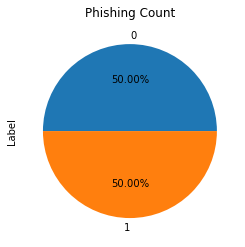

In [11]:
# Phishing Count in pie chart

data['Label'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

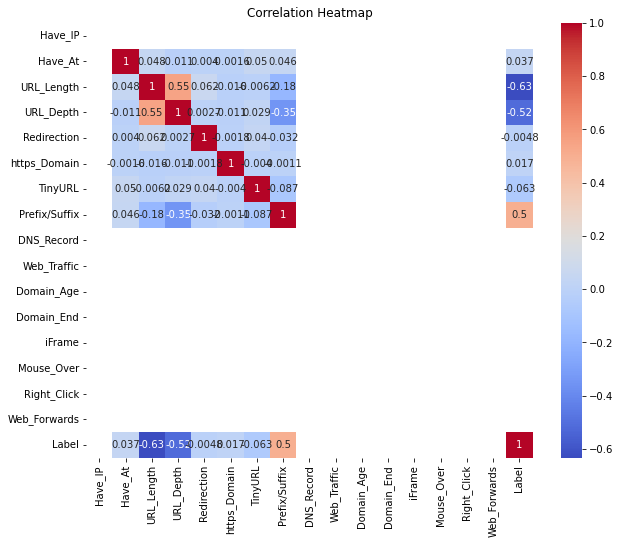

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



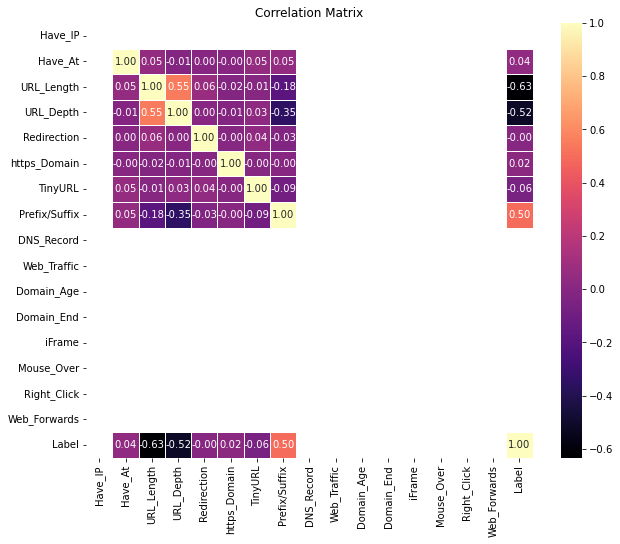

In [13]:
import seaborn as sns

# Compute the correlation matrix
corr = data.corr()

# Plot the correlation matrix as a heatmap with a different colormap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='magma', fmt=".2f", linewidths=0.5)  # Change 'magma' to any other colormap you prefer
plt.title('Correlation Matrix')
plt.show()


In [14]:
# Splitting the dataset into dependant and independant fetature

X = data.drop(["Label"],axis =1)
y = data["Label"]

In [15]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((32000, 16), (32000,), (8000, 16), (8000,))

In [16]:
from sklearn.feature_selection import SelectKBest, chi2
k_best = SelectKBest(score_func=chi2, k=10)  # Select top 10 features
X_selected = k_best.fit_transform(X, y)

# Get the indices of the selected features
selected_indices = k_best.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_indices]

# Print the names of the selected features
print("Selected Features:")
for feature in selected_features:
    print(feature)

Selected Features:
Have_At
URL_Length
URL_Depth
Redirection
https_Domain
TinyURL
Prefix/Suffix
Mouse_Over
Right_Click
Web_Forwards


In [17]:
best_features=['Have_At','URL_Length','URL_Depth','Redirection','https_Domain','TinyURL']
# Subset the training and test datasets to include only the selected features
X= X[best_features]
# X_test_selected = X_test[selected_features]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((32000, 6), (32000,), (8000, 6), (8000,))

In [18]:
# Creating holders to store the model performance results
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

In [19]:
# Linear regression model 
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log = LogisticRegression()

# fit the model 
log.fit(X_train,y_train)

LogisticRegression()

In [20]:
#predicting the target value from the model for the samples

y_train_log = log.predict(X_train)
y_test_log = log.predict(X_test)

In [21]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_log = metrics.accuracy_score(y_train,y_train_log)
acc_test_log = metrics.accuracy_score(y_test,y_test_log)
print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_log))
print()

f1_score_train_log = metrics.f1_score(y_train,y_train_log)
f1_score_test_log = metrics.f1_score(y_test,y_test_log)
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_log)
recall_score_test_log = metrics.recall_score(y_test,y_test_log)
print("Logistic Regression : Recall on training Data: {:.3f}".format(recall_score_train_log))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_log)
precision_score_test_log = metrics.precision_score(y_test,y_test_log)
print("Logistic Regression : precision on training Data: {:.3f}".format(precision_score_train_log))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_score_test_log))

Logistic Regression : Accuracy on training Data: 0.823
Logistic Regression : Accuracy on test Data: 0.828

Logistic Regression : f1_score on training Data: 0.788
Logistic Regression : f1_score on test Data: 0.799

Logistic Regression : Recall on training Data: 0.660
Logistic Regression : Recall on test Data: 0.674

Logistic Regression : precision on training Data: 0.977
Logistic Regression : precision on test Data: 0.980


In [22]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_log))

              precision    recall  f1-score   support

           0       0.75      0.99      0.85      3954
           1       0.98      0.67      0.80      4046

    accuracy                           0.83      8000
   macro avg       0.86      0.83      0.82      8000
weighted avg       0.86      0.83      0.82      8000



In [23]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Logistic Regression',acc_test_log,f1_score_test_log,
             recall_score_train_log,precision_score_train_log)

<AxesSubplot:>

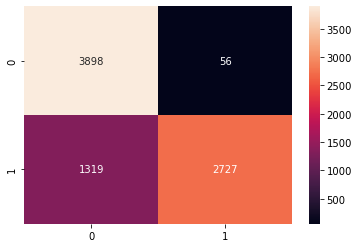

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_log)
sns.heatmap(confusion_matrix(y_test, y_test_log), annot = True, fmt='0.0f')

In [25]:
# K-Nearest Neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=1)

# fit the model 
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [26]:
#predicting the target value from the model for the samples
y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)

In [27]:
#computing the accuracy,f1_score,Recall,precision of the model performance

acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)
print("K-Nearest Neighbors : Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("K-Nearest Neighbors : Accuracy on test Data: {:.3f}".format(acc_test_knn))
print()

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn)
print("K-Nearest Neighbors : f1_score on training Data: {:.3f}".format(f1_score_train_knn))
print("K-Nearest Neighbors : f1_score on test Data: {:.3f}".format(f1_score_test_knn))
print()

recall_score_train_knn = metrics.recall_score(y_train,y_train_knn)
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn)
print("K-Nearest Neighborsn : Recall on training Data: {:.3f}".format(recall_score_train_knn))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_knn))
print()

precision_score_train_knn = metrics.precision_score(y_train,y_train_knn)
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn)
print("K-Nearest Neighbors : precision on training Data: {:.3f}".format(precision_score_train_knn))
print("K-Nearest Neighbors : precision on test Data: {:.3f}".format(precision_score_test_knn))

K-Nearest Neighbors : Accuracy on training Data: 0.684
K-Nearest Neighbors : Accuracy on test Data: 0.672

K-Nearest Neighbors : f1_score on training Data: 0.727
K-Nearest Neighbors : f1_score on test Data: 0.721

K-Nearest Neighborsn : Recall on training Data: 0.843
Logistic Regression : Recall on test Data: 0.839

K-Nearest Neighbors : precision on training Data: 0.638
K-Nearest Neighbors : precision on test Data: 0.632


In [28]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_knn))

              precision    recall  f1-score   support

           0       0.75      0.50      0.60      3954
           1       0.63      0.84      0.72      4046

    accuracy                           0.67      8000
   macro avg       0.69      0.67      0.66      8000
weighted avg       0.69      0.67      0.66      8000



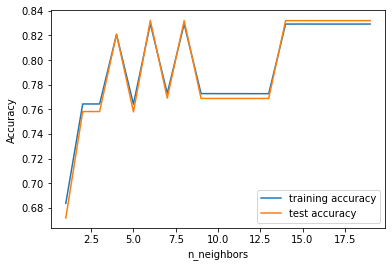

In [29]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend();

In [30]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('K-Nearest Neighbors',acc_test_knn,f1_score_test_knn,
             recall_score_train_knn,precision_score_train_knn)

<AxesSubplot:>

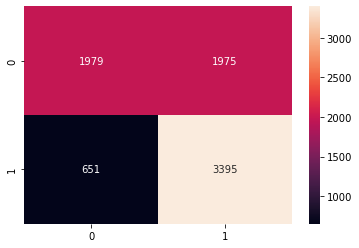

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_knn)
sns.heatmap(confusion_matrix(y_test, y_test_knn), annot = True, fmt='0.0f')

In [32]:
# Support Vector Classifier model 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}

svc = GridSearchCV(SVC(), param_grid)

# fitting the model for grid search
svc.fit(X_train, y_train)


GridSearchCV(estimator=SVC(),
             param_grid={'gamma': [0.1], 'kernel': ['rbf', 'linear']})

In [33]:
#predicting the target value from the model for the samples
y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test)

In [34]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)
print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(acc_train_svc))
print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(acc_test_svc))
print()

f1_score_train_svc = metrics.f1_score(y_train,y_train_svc)
f1_score_test_svc = metrics.f1_score(y_test,y_test_svc)
print("Support Vector Machine : f1_score on training Data: {:.3f}".format(f1_score_train_svc))
print("Support Vector Machine : f1_score on test Data: {:.3f}".format(f1_score_test_svc))
print()

recall_score_train_svc = metrics.recall_score(y_train,y_train_svc)
recall_score_test_svc = metrics.recall_score(y_test,y_test_svc)
print("Support Vector Machine : Recall on training Data: {:.3f}".format(recall_score_train_svc))
print("Support Vector Machine : Recall on test Data: {:.3f}".format(recall_score_test_svc))
print()

precision_score_train_svc = metrics.precision_score(y_train,y_train_svc)
precision_score_test_svc = metrics.precision_score(y_test,y_test_svc)
print("Support Vector Machine : precision on training Data: {:.3f}".format(precision_score_train_svc))
print("Support Vector Machine : precision on test Data: {:.3f}".format(precision_score_test_svc))

Support Vector Machine : Accuracy on training Data: 0.828
Support Vector Machine : Accuracy on test Data: 0.832

Support Vector Machine : f1_score on training Data: 0.794
Support Vector Machine : f1_score on test Data: 0.802

Support Vector Machine : Recall on training Data: 0.664
Support Vector Machine : Recall on test Data: 0.676

Support Vector Machine : precision on training Data: 0.986
Support Vector Machine : precision on test Data: 0.987


In [35]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

           0       0.75      0.99      0.85      3954
           1       0.99      0.68      0.80      4046

    accuracy                           0.83      8000
   macro avg       0.87      0.83      0.83      8000
weighted avg       0.87      0.83      0.83      8000



<AxesSubplot:>

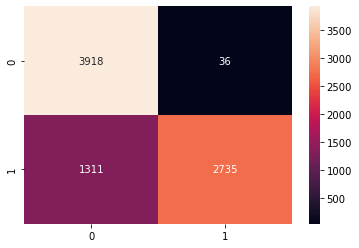

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_svc)
sns.heatmap(confusion_matrix(y_test, y_test_svc), annot = True, fmt='0.0f')

In [37]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Support Vector Machine',acc_test_svc,f1_score_test_svc,
             recall_score_train_svc,precision_score_train_svc)

In [38]:
# Naive Bayes Classifier Model
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

# instantiate the model
nb=  GaussianNB()

# fit the model 
nb.fit(X_train,y_train)

GaussianNB()

In [39]:
#predicting the target value from the model for the samples
y_train_nb = nb.predict(X_train)
y_test_nb = nb.predict(X_test)

In [40]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_nb = metrics.accuracy_score(y_train,y_train_nb)
acc_test_nb = metrics.accuracy_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Accuracy on training Data: {:.3f}".format(acc_train_nb))
print("Naive Bayes Classifier : Accuracy on test Data: {:.3f}".format(acc_test_nb))
print()

f1_score_train_nb = metrics.f1_score(y_train,y_train_nb)
f1_score_test_nb = metrics.f1_score(y_test,y_test_nb)
print("Naive Bayes Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_nb))
print("Naive Bayes Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_nb))
print()

recall_score_train_nb = metrics.recall_score(y_train,y_train_nb)
recall_score_test_nb = metrics.recall_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Recall on training Data: {:.3f}".format(recall_score_train_nb))
print("Naive Bayes Classifier : Recall on test Data: {:.3f}".format(recall_score_test_nb))
print()

precision_score_train_nb = metrics.precision_score(y_train,y_train_nb)
precision_score_test_nb = metrics.precision_score(y_test,y_test_nb)
print("Naive Bayes Classifier : precision on training Data: {:.3f}".format(precision_score_train_nb))
print("Naive Bayes Classifier : precision on test Data: {:.3f}".format(precision_score_test_nb))

Naive Bayes Classifier : Accuracy on training Data: 0.788
Naive Bayes Classifier : Accuracy on test Data: 0.795

Naive Bayes Classifier : f1_score on training Data: 0.732
Naive Bayes Classifier : f1_score on test Data: 0.748

Naive Bayes Classifier : Recall on training Data: 0.580
Naive Bayes Classifier : Recall on test Data: 0.600

Naive Bayes Classifier : precision on training Data: 0.990
Naive Bayes Classifier : precision on test Data: 0.992


In [41]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

           0       0.75      0.99      0.85      3954
           1       0.99      0.68      0.80      4046

    accuracy                           0.83      8000
   macro avg       0.87      0.83      0.83      8000
weighted avg       0.87      0.83      0.83      8000



<AxesSubplot:>

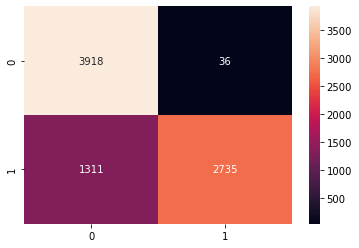

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_svc)
sns.heatmap(confusion_matrix(y_test, y_test_svc), annot = True, fmt='0.0f')

In [43]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Naive Bayes Classifier',acc_test_nb,f1_score_test_nb,
             recall_score_train_nb,precision_score_train_nb)

In [44]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [45]:
#predicting the target value from the model for the samples

y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

In [46]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))
print()

f1_score_train_tree = metrics.f1_score(y_train,y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train,y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train,y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))

Decision Tree : Accuracy on training Data: 0.830
Decision Tree : Accuracy on test Data: 0.833

Decision Tree : f1_score on training Data: 0.795
Decision Tree : f1_score on test Data: 0.802

Decision Tree : Recall on training Data: 0.662
Decision Tree : Recall on test Data: 0.673

Decision Tree : precision on training Data: 0.994
Decision Tree : precision on test Data: 0.994


In [47]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_tree))

              precision    recall  f1-score   support

           0       0.75      1.00      0.85      3954
           1       0.99      0.67      0.80      4046

    accuracy                           0.83      8000
   macro avg       0.87      0.83      0.83      8000
weighted avg       0.87      0.83      0.83      8000



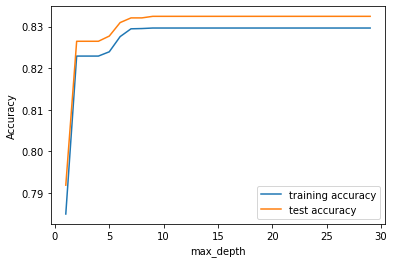

In [48]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [49]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Decision Tree',acc_test_tree,f1_score_test_tree,
             recall_score_train_tree,precision_score_train_tree)

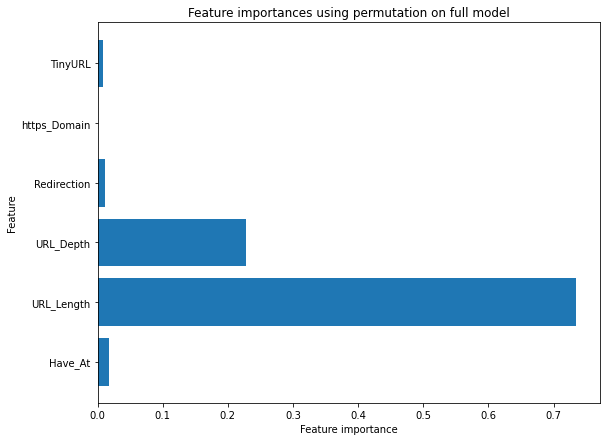

In [50]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [51]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=10)

# fit the model 
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [52]:
#predicting the target value from the model for the samples
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

In [53]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_tree)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))

Random Forest : Accuracy on training Data: 0.830
Random Forest : Accuracy on test Data: 0.833

Random Forest : f1_score on training Data: 0.795
Random Forest : f1_score on test Data: 0.802

Random Forest : Recall on training Data: 0.662
Random Forest : Recall on test Data: 0.673

Random Forest : precision on training Data: 0.994
Random Forest : precision on test Data: 0.994


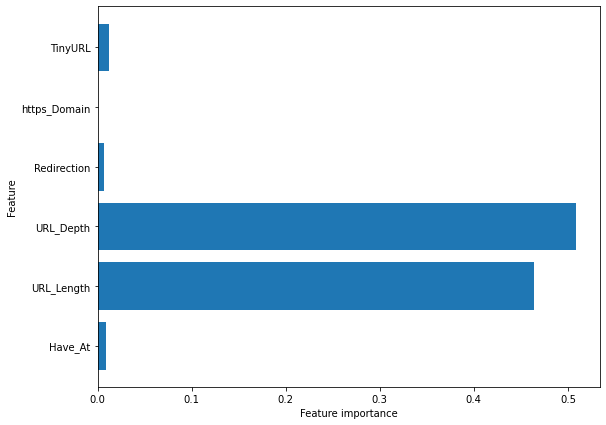

In [54]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [55]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_forest))

              precision    recall  f1-score   support

           0       0.75      1.00      0.85      3954
           1       0.99      0.67      0.80      4046

    accuracy                           0.83      8000
   macro avg       0.87      0.83      0.83      8000
weighted avg       0.87      0.83      0.83      8000



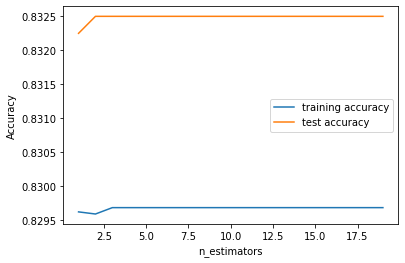

In [56]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();

In [57]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Random Forest',acc_test_forest,f1_score_test_forest,
             recall_score_train_forest,precision_score_train_forest)

In [58]:
# Gradient Boosting Classifier Model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [59]:
#predicting the target value from the model for the samples
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

In [60]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc)
recall_score_test_gbc =  metrics.recall_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boosting Classifier : Recall on test Data: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boosting Classifier : precision on test Data: {:.3f}".format(precision_score_test_gbc))

Gradient Boosting Classifier : Accuracy on training Data: 0.830
Gradient Boosting Classifier : Accuracy on test Data: 0.833

Gradient Boosting Classifier : f1_score on training Data: 0.795
Gradient Boosting Classifier : f1_score on test Data: 0.803

Gradient Boosting Classifier : Recall on training Data: 0.662
Gradient Boosting Classifier : Recall on test Data: 0.673

Gradient Boosting Classifier : precision on training Data: 0.994
Gradient Boosting Classifier : precision on test Data: 0.994


In [61]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_gbc))

              precision    recall  f1-score   support

           0       0.75      1.00      0.85      3954
           1       0.99      0.67      0.80      4046

    accuracy                           0.83      8000
   macro avg       0.87      0.83      0.83      8000
weighted avg       0.87      0.83      0.83      8000



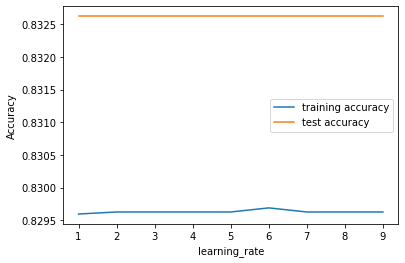

In [62]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  GradientBoostingClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

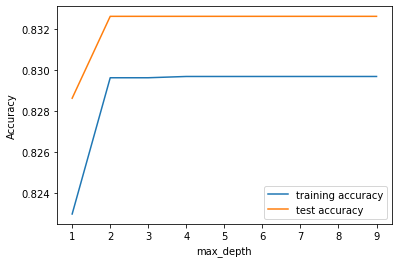

In [63]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10,1)
for n in depth:
    forest_test =  GradientBoostingClassifier(max_depth=n,learning_rate = 0.7)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [64]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Gradient Boosting Classifier',acc_test_gbc,f1_score_test_gbc,
             recall_score_train_gbc,precision_score_train_gbc)

## 5.8. CatBoost Classifier

CatBoost is a recently open-sourced machine learning algorithm from Yandex. It can easily integrate with deep learning frameworks like Google’s TensorFlow and Apple’s Core ML. It can work with diverse data types to help solve a wide range of problems that businesses face today.

In [65]:
#  catboost Classifier Model
from catboost import CatBoostClassifier

# instantiate the model
cat = CatBoostClassifier(learning_rate  = 0.1)

# fit the model 
cat.fit(X_train,y_train)

0:	learn: 0.5719038	total: 157ms	remaining: 2m 36s
1:	learn: 0.4977186	total: 171ms	remaining: 1m 25s
2:	learn: 0.4553207	total: 185ms	remaining: 1m 1s
3:	learn: 0.4292240	total: 200ms	remaining: 49.8s
4:	learn: 0.4123118	total: 214ms	remaining: 42.7s
5:	learn: 0.3983697	total: 228ms	remaining: 37.7s
6:	learn: 0.3895022	total: 241ms	remaining: 34.2s
7:	learn: 0.3831044	total: 254ms	remaining: 31.5s
8:	learn: 0.3776164	total: 267ms	remaining: 29.4s
9:	learn: 0.3735999	total: 280ms	remaining: 27.8s
10:	learn: 0.3692923	total: 295ms	remaining: 26.5s
11:	learn: 0.3664128	total: 308ms	remaining: 25.4s
12:	learn: 0.3630891	total: 322ms	remaining: 24.4s
13:	learn: 0.3609229	total: 336ms	remaining: 23.6s
14:	learn: 0.3587107	total: 351ms	remaining: 23.1s
15:	learn: 0.3569634	total: 365ms	remaining: 22.5s
16:	learn: 0.3551062	total: 384ms	remaining: 22.2s
17:	learn: 0.3536707	total: 401ms	remaining: 21.9s
18:	learn: 0.3526504	total: 419ms	remaining: 21.6s
19:	learn: 0.3516990	total: 434ms	remai

175:	learn: 0.3438514	total: 2.67s	remaining: 12.5s
176:	learn: 0.3438514	total: 2.68s	remaining: 12.5s
177:	learn: 0.3438514	total: 2.7s	remaining: 12.5s
178:	learn: 0.3438514	total: 2.71s	remaining: 12.4s
179:	learn: 0.3438514	total: 2.72s	remaining: 12.4s
180:	learn: 0.3438514	total: 2.73s	remaining: 12.4s
181:	learn: 0.3438514	total: 2.74s	remaining: 12.3s
182:	learn: 0.3438514	total: 2.75s	remaining: 12.3s
183:	learn: 0.3438514	total: 2.76s	remaining: 12.2s
184:	learn: 0.3438514	total: 2.77s	remaining: 12.2s
185:	learn: 0.3438514	total: 2.78s	remaining: 12.2s
186:	learn: 0.3438514	total: 2.79s	remaining: 12.1s
187:	learn: 0.3438514	total: 2.8s	remaining: 12.1s
188:	learn: 0.3438514	total: 2.81s	remaining: 12.1s
189:	learn: 0.3438514	total: 2.82s	remaining: 12s
190:	learn: 0.3438514	total: 2.83s	remaining: 12s
191:	learn: 0.3438514	total: 2.84s	remaining: 12s
192:	learn: 0.3438514	total: 2.85s	remaining: 11.9s
193:	learn: 0.3438514	total: 2.87s	remaining: 11.9s
194:	learn: 0.343851

339:	learn: 0.3438514	total: 4.6s	remaining: 8.94s
340:	learn: 0.3438514	total: 4.61s	remaining: 8.92s
341:	learn: 0.3438514	total: 4.63s	remaining: 8.9s
342:	learn: 0.3438514	total: 4.64s	remaining: 8.88s
343:	learn: 0.3438514	total: 4.65s	remaining: 8.86s
344:	learn: 0.3438514	total: 4.66s	remaining: 8.84s
345:	learn: 0.3438514	total: 4.67s	remaining: 8.83s
346:	learn: 0.3438514	total: 4.68s	remaining: 8.81s
347:	learn: 0.3438514	total: 4.69s	remaining: 8.79s
348:	learn: 0.3438514	total: 4.7s	remaining: 8.77s
349:	learn: 0.3438514	total: 4.72s	remaining: 8.76s
350:	learn: 0.3438514	total: 4.73s	remaining: 8.75s
351:	learn: 0.3438514	total: 4.74s	remaining: 8.73s
352:	learn: 0.3438514	total: 4.75s	remaining: 8.71s
353:	learn: 0.3438514	total: 4.76s	remaining: 8.7s
354:	learn: 0.3438514	total: 4.78s	remaining: 8.68s
355:	learn: 0.3438514	total: 4.79s	remaining: 8.66s
356:	learn: 0.3438514	total: 4.8s	remaining: 8.65s
357:	learn: 0.3438514	total: 4.81s	remaining: 8.63s
358:	learn: 0.343

507:	learn: 0.3438514	total: 6.57s	remaining: 6.36s
508:	learn: 0.3438514	total: 6.58s	remaining: 6.35s
509:	learn: 0.3438514	total: 6.59s	remaining: 6.33s
510:	learn: 0.3438514	total: 6.6s	remaining: 6.32s
511:	learn: 0.3438514	total: 6.62s	remaining: 6.3s
512:	learn: 0.3438514	total: 6.63s	remaining: 6.29s
513:	learn: 0.3438514	total: 6.63s	remaining: 6.27s
514:	learn: 0.3438514	total: 6.65s	remaining: 6.26s
515:	learn: 0.3438514	total: 6.66s	remaining: 6.24s
516:	learn: 0.3438514	total: 6.67s	remaining: 6.23s
517:	learn: 0.3438514	total: 6.68s	remaining: 6.22s
518:	learn: 0.3438514	total: 6.69s	remaining: 6.2s
519:	learn: 0.3438514	total: 6.71s	remaining: 6.19s
520:	learn: 0.3438514	total: 6.72s	remaining: 6.18s
521:	learn: 0.3438514	total: 6.73s	remaining: 6.16s
522:	learn: 0.3438514	total: 6.74s	remaining: 6.15s
523:	learn: 0.3438514	total: 6.75s	remaining: 6.13s
524:	learn: 0.3438514	total: 6.76s	remaining: 6.12s
525:	learn: 0.3438514	total: 6.78s	remaining: 6.11s
526:	learn: 0.3

676:	learn: 0.3438514	total: 8.51s	remaining: 4.06s
677:	learn: 0.3438514	total: 8.52s	remaining: 4.05s
678:	learn: 0.3438514	total: 8.53s	remaining: 4.03s
679:	learn: 0.3438514	total: 8.55s	remaining: 4.02s
680:	learn: 0.3438514	total: 8.56s	remaining: 4.01s
681:	learn: 0.3438514	total: 8.57s	remaining: 4s
682:	learn: 0.3438514	total: 8.58s	remaining: 3.98s
683:	learn: 0.3438514	total: 8.6s	remaining: 3.97s
684:	learn: 0.3438514	total: 8.61s	remaining: 3.96s
685:	learn: 0.3438514	total: 8.62s	remaining: 3.94s
686:	learn: 0.3438514	total: 8.63s	remaining: 3.93s
687:	learn: 0.3438514	total: 8.64s	remaining: 3.92s
688:	learn: 0.3438514	total: 8.65s	remaining: 3.9s
689:	learn: 0.3438514	total: 8.66s	remaining: 3.89s
690:	learn: 0.3438514	total: 8.67s	remaining: 3.88s
691:	learn: 0.3438514	total: 8.68s	remaining: 3.86s
692:	learn: 0.3438514	total: 8.69s	remaining: 3.85s
693:	learn: 0.3438514	total: 8.7s	remaining: 3.84s
694:	learn: 0.3438514	total: 8.72s	remaining: 3.83s
695:	learn: 0.3438

847:	learn: 0.3438514	total: 10.4s	remaining: 1.87s
848:	learn: 0.3438514	total: 10.4s	remaining: 1.86s
849:	learn: 0.3438514	total: 10.5s	remaining: 1.84s
850:	learn: 0.3438514	total: 10.5s	remaining: 1.83s
851:	learn: 0.3438514	total: 10.5s	remaining: 1.82s
852:	learn: 0.3438514	total: 10.5s	remaining: 1.81s
853:	learn: 0.3438514	total: 10.5s	remaining: 1.79s
854:	learn: 0.3438514	total: 10.5s	remaining: 1.78s
855:	learn: 0.3438514	total: 10.5s	remaining: 1.77s
856:	learn: 0.3438514	total: 10.5s	remaining: 1.76s
857:	learn: 0.3438514	total: 10.5s	remaining: 1.75s
858:	learn: 0.3438514	total: 10.6s	remaining: 1.73s
859:	learn: 0.3438514	total: 10.6s	remaining: 1.72s
860:	learn: 0.3438514	total: 10.6s	remaining: 1.71s
861:	learn: 0.3438514	total: 10.6s	remaining: 1.69s
862:	learn: 0.3438514	total: 10.6s	remaining: 1.68s
863:	learn: 0.3438514	total: 10.6s	remaining: 1.67s
864:	learn: 0.3438514	total: 10.6s	remaining: 1.66s
865:	learn: 0.3438514	total: 10.6s	remaining: 1.64s
866:	learn: 

In [66]:
#predicting the target value from the model for the samples
y_train_cat = cat.predict(X_train)
y_test_cat = cat.predict(X_test)


In [67]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_cat  = metrics.accuracy_score(y_train,y_train_cat)
acc_test_cat = metrics.accuracy_score(y_test,y_test_cat)
print("CatBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_cat))
print("CatBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_cat))
print()

f1_score_train_cat = metrics.f1_score(y_train,y_train_cat)
f1_score_test_cat = metrics.f1_score(y_test,y_test_cat)
print("CatBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_cat))
print("CatBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_cat))
print()

recall_score_train_cat = metrics.recall_score(y_train,y_train_cat)
recall_score_test_cat = metrics.recall_score(y_test,y_test_cat)
print("CatBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_cat))
print("CatBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_test_cat))
print()

precision_score_train_cat = metrics.precision_score(y_train,y_train_cat)
precision_score_test_cat = metrics.precision_score(y_test,y_test_cat)
print("CatBoost Classifier : precision on training Data: {:.3f}".format(precision_score_train_cat))
print("CatBoost Classifier : precision on test Data: {:.3f}".format(precision_score_test_cat))

CatBoost Classifier : Accuracy on training Data: 0.830
CatBoost Classifier : Accuracy on test Data: 0.833

CatBoost Classifier : f1_score on training Data: 0.795
CatBoost Classifier : f1_score on test Data: 0.803

CatBoost Classifier : Recall on training Data: 0.662
CatBoost Classifier : Recall on test Data: 0.673

CatBoost Classifier : precision on training Data: 0.994
CatBoost Classifier : precision on test Data: 0.994


In [68]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_cat))

              precision    recall  f1-score   support

           0       0.75      1.00      0.85      3954
           1       0.99      0.67      0.80      4046

    accuracy                           0.83      8000
   macro avg       0.87      0.83      0.83      8000
weighted avg       0.87      0.83      0.83      8000



In [69]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  CatBoostClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

0:	learn: 0.5719038	total: 15.9ms	remaining: 15.8s
1:	learn: 0.4977186	total: 31.5ms	remaining: 15.7s
2:	learn: 0.4553207	total: 45.3ms	remaining: 15s
3:	learn: 0.4292240	total: 59.5ms	remaining: 14.8s
4:	learn: 0.4123118	total: 73.7ms	remaining: 14.7s
5:	learn: 0.3983697	total: 86.7ms	remaining: 14.4s
6:	learn: 0.3895022	total: 99.4ms	remaining: 14.1s
7:	learn: 0.3831044	total: 112ms	remaining: 13.9s
8:	learn: 0.3776164	total: 125ms	remaining: 13.8s
9:	learn: 0.3735999	total: 139ms	remaining: 13.8s
10:	learn: 0.3692923	total: 153ms	remaining: 13.8s
11:	learn: 0.3664128	total: 167ms	remaining: 13.8s
12:	learn: 0.3630891	total: 182ms	remaining: 13.8s
13:	learn: 0.3609229	total: 196ms	remaining: 13.8s
14:	learn: 0.3587107	total: 210ms	remaining: 13.8s
15:	learn: 0.3569634	total: 228ms	remaining: 14s
16:	learn: 0.3551062	total: 242ms	remaining: 14s
17:	learn: 0.3536707	total: 257ms	remaining: 14s
18:	learn: 0.3526504	total: 272ms	remaining: 14s
19:	learn: 0.3516990	total: 285ms	remaining:

165:	learn: 0.3438681	total: 2.17s	remaining: 10.9s
166:	learn: 0.3438596	total: 2.19s	remaining: 10.9s
167:	learn: 0.3438525	total: 2.2s	remaining: 10.9s
168:	learn: 0.3438525	total: 2.21s	remaining: 10.9s
169:	learn: 0.3438524	total: 2.22s	remaining: 10.8s
170:	learn: 0.3438521	total: 2.23s	remaining: 10.8s
171:	learn: 0.3438514	total: 2.25s	remaining: 10.8s
172:	learn: 0.3438514	total: 2.25s	remaining: 10.8s
173:	learn: 0.3438514	total: 2.27s	remaining: 10.8s
174:	learn: 0.3438514	total: 2.28s	remaining: 10.7s
175:	learn: 0.3438514	total: 2.29s	remaining: 10.7s
176:	learn: 0.3438514	total: 2.3s	remaining: 10.7s
177:	learn: 0.3438514	total: 2.31s	remaining: 10.7s
178:	learn: 0.3438514	total: 2.33s	remaining: 10.7s
179:	learn: 0.3438514	total: 2.34s	remaining: 10.7s
180:	learn: 0.3438514	total: 2.35s	remaining: 10.6s
181:	learn: 0.3438514	total: 2.37s	remaining: 10.6s
182:	learn: 0.3438514	total: 2.38s	remaining: 10.6s
183:	learn: 0.3438514	total: 2.39s	remaining: 10.6s
184:	learn: 0.

332:	learn: 0.3438514	total: 4.02s	remaining: 8.05s
333:	learn: 0.3438514	total: 4.03s	remaining: 8.04s
334:	learn: 0.3438514	total: 4.04s	remaining: 8.02s
335:	learn: 0.3438514	total: 4.05s	remaining: 8.01s
336:	learn: 0.3438514	total: 4.06s	remaining: 7.99s
337:	learn: 0.3438514	total: 4.07s	remaining: 7.98s
338:	learn: 0.3438514	total: 4.08s	remaining: 7.96s
339:	learn: 0.3438514	total: 4.09s	remaining: 7.95s
340:	learn: 0.3438514	total: 4.11s	remaining: 7.93s
341:	learn: 0.3438514	total: 4.12s	remaining: 7.92s
342:	learn: 0.3438514	total: 4.13s	remaining: 7.9s
343:	learn: 0.3438514	total: 4.14s	remaining: 7.89s
344:	learn: 0.3438514	total: 4.15s	remaining: 7.87s
345:	learn: 0.3438514	total: 4.16s	remaining: 7.86s
346:	learn: 0.3438514	total: 4.17s	remaining: 7.84s
347:	learn: 0.3438514	total: 4.18s	remaining: 7.83s
348:	learn: 0.3438514	total: 4.19s	remaining: 7.81s
349:	learn: 0.3438514	total: 4.2s	remaining: 7.8s
350:	learn: 0.3438514	total: 4.21s	remaining: 7.78s
351:	learn: 0.3

492:	learn: 0.3438514	total: 5.79s	remaining: 5.95s
493:	learn: 0.3438514	total: 5.8s	remaining: 5.94s
494:	learn: 0.3438514	total: 5.81s	remaining: 5.93s
495:	learn: 0.3438514	total: 5.83s	remaining: 5.92s
496:	learn: 0.3438514	total: 5.84s	remaining: 5.91s
497:	learn: 0.3438514	total: 5.85s	remaining: 5.9s
498:	learn: 0.3438514	total: 5.87s	remaining: 5.89s
499:	learn: 0.3438514	total: 5.88s	remaining: 5.88s
500:	learn: 0.3438514	total: 5.89s	remaining: 5.87s
501:	learn: 0.3438514	total: 5.9s	remaining: 5.85s
502:	learn: 0.3438514	total: 5.91s	remaining: 5.84s
503:	learn: 0.3438514	total: 5.92s	remaining: 5.83s
504:	learn: 0.3438514	total: 5.94s	remaining: 5.82s
505:	learn: 0.3438514	total: 5.95s	remaining: 5.81s
506:	learn: 0.3438514	total: 5.96s	remaining: 5.79s
507:	learn: 0.3438514	total: 5.97s	remaining: 5.78s
508:	learn: 0.3438514	total: 5.98s	remaining: 5.77s
509:	learn: 0.3438514	total: 6s	remaining: 5.76s
510:	learn: 0.3438514	total: 6.01s	remaining: 5.75s
511:	learn: 0.3438

651:	learn: 0.3438514	total: 7.57s	remaining: 4.04s
652:	learn: 0.3438514	total: 7.58s	remaining: 4.03s
653:	learn: 0.3438514	total: 7.59s	remaining: 4.01s
654:	learn: 0.3438514	total: 7.6s	remaining: 4s
655:	learn: 0.3438514	total: 7.61s	remaining: 3.99s
656:	learn: 0.3438514	total: 7.62s	remaining: 3.98s
657:	learn: 0.3438514	total: 7.63s	remaining: 3.96s
658:	learn: 0.3438514	total: 7.64s	remaining: 3.95s
659:	learn: 0.3438514	total: 7.65s	remaining: 3.94s
660:	learn: 0.3438514	total: 7.66s	remaining: 3.93s
661:	learn: 0.3438514	total: 7.67s	remaining: 3.92s
662:	learn: 0.3438514	total: 7.68s	remaining: 3.9s
663:	learn: 0.3438514	total: 7.69s	remaining: 3.89s
664:	learn: 0.3438514	total: 7.7s	remaining: 3.88s
665:	learn: 0.3438514	total: 7.71s	remaining: 3.87s
666:	learn: 0.3438514	total: 7.72s	remaining: 3.86s
667:	learn: 0.3438514	total: 7.73s	remaining: 3.84s
668:	learn: 0.3438514	total: 7.74s	remaining: 3.83s
669:	learn: 0.3438514	total: 7.76s	remaining: 3.82s
670:	learn: 0.3438

826:	learn: 0.3438514	total: 9.5s	remaining: 1.99s
827:	learn: 0.3438514	total: 9.52s	remaining: 1.98s
828:	learn: 0.3438514	total: 9.53s	remaining: 1.97s
829:	learn: 0.3438514	total: 9.54s	remaining: 1.95s
830:	learn: 0.3438514	total: 9.55s	remaining: 1.94s
831:	learn: 0.3438514	total: 9.56s	remaining: 1.93s
832:	learn: 0.3438514	total: 9.57s	remaining: 1.92s
833:	learn: 0.3438514	total: 9.59s	remaining: 1.91s
834:	learn: 0.3438514	total: 9.6s	remaining: 1.9s
835:	learn: 0.3438514	total: 9.61s	remaining: 1.88s
836:	learn: 0.3438514	total: 9.62s	remaining: 1.87s
837:	learn: 0.3438514	total: 9.63s	remaining: 1.86s
838:	learn: 0.3438514	total: 9.64s	remaining: 1.85s
839:	learn: 0.3438514	total: 9.65s	remaining: 1.84s
840:	learn: 0.3438514	total: 9.66s	remaining: 1.83s
841:	learn: 0.3438514	total: 9.68s	remaining: 1.81s
842:	learn: 0.3438514	total: 9.69s	remaining: 1.8s
843:	learn: 0.3438514	total: 9.7s	remaining: 1.79s
844:	learn: 0.3438514	total: 9.71s	remaining: 1.78s
845:	learn: 0.343

996:	learn: 0.3438514	total: 11.5s	remaining: 34.5ms
997:	learn: 0.3438514	total: 11.5s	remaining: 23ms
998:	learn: 0.3438514	total: 11.5s	remaining: 11.5ms
999:	learn: 0.3438514	total: 11.5s	remaining: 0us
0:	learn: 0.4964435	total: 14.4ms	remaining: 14.4s
1:	learn: 0.4257984	total: 27.9ms	remaining: 13.9s
2:	learn: 0.4041019	total: 43.2ms	remaining: 14.4s
3:	learn: 0.3811014	total: 58.3ms	remaining: 14.5s
4:	learn: 0.3702635	total: 71.9ms	remaining: 14.3s
5:	learn: 0.3623995	total: 84.3ms	remaining: 14s
6:	learn: 0.3578124	total: 98.1ms	remaining: 13.9s
7:	learn: 0.3555380	total: 112ms	remaining: 13.9s
8:	learn: 0.3533683	total: 125ms	remaining: 13.8s
9:	learn: 0.3523639	total: 136ms	remaining: 13.5s
10:	learn: 0.3515938	total: 148ms	remaining: 13.3s
11:	learn: 0.3501116	total: 161ms	remaining: 13.3s
12:	learn: 0.3493616	total: 172ms	remaining: 13.1s
13:	learn: 0.3487293	total: 184ms	remaining: 13s
14:	learn: 0.3483981	total: 198ms	remaining: 13s
15:	learn: 0.3481710	total: 210ms	rem

164:	learn: 0.3439169	total: 2.02s	remaining: 10.2s
165:	learn: 0.3439169	total: 2.04s	remaining: 10.2s
166:	learn: 0.3439169	total: 2.05s	remaining: 10.2s
167:	learn: 0.3439169	total: 2.06s	remaining: 10.2s
168:	learn: 0.3439169	total: 2.07s	remaining: 10.2s
169:	learn: 0.3439169	total: 2.08s	remaining: 10.1s
170:	learn: 0.3439169	total: 2.09s	remaining: 10.1s
171:	learn: 0.3439169	total: 2.1s	remaining: 10.1s
172:	learn: 0.3439169	total: 2.11s	remaining: 10.1s
173:	learn: 0.3439169	total: 2.12s	remaining: 10.1s
174:	learn: 0.3439169	total: 2.13s	remaining: 10.1s
175:	learn: 0.3439169	total: 2.14s	remaining: 10s
176:	learn: 0.3439169	total: 2.15s	remaining: 10s
177:	learn: 0.3439169	total: 2.16s	remaining: 9.98s
178:	learn: 0.3439169	total: 2.17s	remaining: 9.96s
179:	learn: 0.3439169	total: 2.18s	remaining: 9.95s
180:	learn: 0.3439169	total: 2.19s	remaining: 9.93s
181:	learn: 0.3439169	total: 2.21s	remaining: 9.93s
182:	learn: 0.3439169	total: 2.22s	remaining: 9.91s
183:	learn: 0.343

324:	learn: 0.3439169	total: 3.75s	remaining: 7.79s
325:	learn: 0.3439169	total: 3.76s	remaining: 7.78s
326:	learn: 0.3439169	total: 3.77s	remaining: 7.76s
327:	learn: 0.3439169	total: 3.78s	remaining: 7.75s
328:	learn: 0.3439169	total: 3.79s	remaining: 7.74s
329:	learn: 0.3439169	total: 3.8s	remaining: 7.72s
330:	learn: 0.3439169	total: 3.81s	remaining: 7.71s
331:	learn: 0.3439169	total: 3.83s	remaining: 7.7s
332:	learn: 0.3439169	total: 3.83s	remaining: 7.68s
333:	learn: 0.3439169	total: 3.85s	remaining: 7.67s
334:	learn: 0.3439169	total: 3.86s	remaining: 7.66s
335:	learn: 0.3439169	total: 3.87s	remaining: 7.64s
336:	learn: 0.3439169	total: 3.88s	remaining: 7.63s
337:	learn: 0.3439169	total: 3.89s	remaining: 7.61s
338:	learn: 0.3439169	total: 3.9s	remaining: 7.6s
339:	learn: 0.3439169	total: 3.91s	remaining: 7.59s
340:	learn: 0.3439169	total: 3.92s	remaining: 7.57s
341:	learn: 0.3439169	total: 3.93s	remaining: 7.56s
342:	learn: 0.3439169	total: 3.94s	remaining: 7.54s
343:	learn: 0.34

500:	learn: 0.3439169	total: 5.63s	remaining: 5.61s
501:	learn: 0.3439169	total: 5.64s	remaining: 5.59s
502:	learn: 0.3439169	total: 5.65s	remaining: 5.58s
503:	learn: 0.3439169	total: 5.66s	remaining: 5.57s
504:	learn: 0.3439169	total: 5.67s	remaining: 5.56s
505:	learn: 0.3439169	total: 5.68s	remaining: 5.55s
506:	learn: 0.3439169	total: 5.69s	remaining: 5.53s
507:	learn: 0.3439169	total: 5.7s	remaining: 5.52s
508:	learn: 0.3439169	total: 5.71s	remaining: 5.51s
509:	learn: 0.3439169	total: 5.72s	remaining: 5.5s
510:	learn: 0.3439169	total: 5.73s	remaining: 5.48s
511:	learn: 0.3439169	total: 5.74s	remaining: 5.47s
512:	learn: 0.3439169	total: 5.75s	remaining: 5.46s
513:	learn: 0.3439169	total: 5.76s	remaining: 5.45s
514:	learn: 0.3439169	total: 5.77s	remaining: 5.44s
515:	learn: 0.3439169	total: 5.78s	remaining: 5.42s
516:	learn: 0.3439169	total: 5.79s	remaining: 5.41s
517:	learn: 0.3439169	total: 5.8s	remaining: 5.4s
518:	learn: 0.3439169	total: 5.81s	remaining: 5.39s
519:	learn: 0.34

669:	learn: 0.3439169	total: 7.39s	remaining: 3.64s
670:	learn: 0.3439169	total: 7.4s	remaining: 3.63s
671:	learn: 0.3439169	total: 7.41s	remaining: 3.62s
672:	learn: 0.3439169	total: 7.42s	remaining: 3.61s
673:	learn: 0.3439169	total: 7.43s	remaining: 3.6s
674:	learn: 0.3439169	total: 7.44s	remaining: 3.58s
675:	learn: 0.3439169	total: 7.46s	remaining: 3.57s
676:	learn: 0.3439169	total: 7.46s	remaining: 3.56s
677:	learn: 0.3439169	total: 7.48s	remaining: 3.55s
678:	learn: 0.3439169	total: 7.49s	remaining: 3.54s
679:	learn: 0.3439169	total: 7.5s	remaining: 3.53s
680:	learn: 0.3439169	total: 7.51s	remaining: 3.52s
681:	learn: 0.3439169	total: 7.52s	remaining: 3.5s
682:	learn: 0.3439169	total: 7.53s	remaining: 3.49s
683:	learn: 0.3439169	total: 7.54s	remaining: 3.48s
684:	learn: 0.3439169	total: 7.55s	remaining: 3.47s
685:	learn: 0.3439169	total: 7.56s	remaining: 3.46s
686:	learn: 0.3439169	total: 7.57s	remaining: 3.45s
687:	learn: 0.3439169	total: 7.58s	remaining: 3.44s
688:	learn: 0.34

837:	learn: 0.3439169	total: 9.14s	remaining: 1.77s
838:	learn: 0.3439169	total: 9.15s	remaining: 1.75s
839:	learn: 0.3439169	total: 9.16s	remaining: 1.74s
840:	learn: 0.3439169	total: 9.17s	remaining: 1.73s
841:	learn: 0.3439169	total: 9.18s	remaining: 1.72s
842:	learn: 0.3439169	total: 9.19s	remaining: 1.71s
843:	learn: 0.3439169	total: 9.2s	remaining: 1.7s
844:	learn: 0.3439169	total: 9.21s	remaining: 1.69s
845:	learn: 0.3439169	total: 9.22s	remaining: 1.68s
846:	learn: 0.3439169	total: 9.23s	remaining: 1.67s
847:	learn: 0.3439169	total: 9.24s	remaining: 1.66s
848:	learn: 0.3439169	total: 9.26s	remaining: 1.65s
849:	learn: 0.3439169	total: 9.27s	remaining: 1.64s
850:	learn: 0.3439169	total: 9.28s	remaining: 1.62s
851:	learn: 0.3439169	total: 9.29s	remaining: 1.61s
852:	learn: 0.3439169	total: 9.3s	remaining: 1.6s
853:	learn: 0.3439169	total: 9.31s	remaining: 1.59s
854:	learn: 0.3439169	total: 9.32s	remaining: 1.58s
855:	learn: 0.3439169	total: 9.33s	remaining: 1.57s
856:	learn: 0.34

0:	learn: 0.4515358	total: 13.2ms	remaining: 13.2s
1:	learn: 0.3907172	total: 26.6ms	remaining: 13.3s
2:	learn: 0.3731505	total: 39.1ms	remaining: 13s
3:	learn: 0.3642612	total: 52.3ms	remaining: 13s
4:	learn: 0.3558082	total: 64.8ms	remaining: 12.9s
5:	learn: 0.3539465	total: 76.5ms	remaining: 12.7s
6:	learn: 0.3506403	total: 89.2ms	remaining: 12.7s
7:	learn: 0.3493542	total: 102ms	remaining: 12.6s
8:	learn: 0.3480398	total: 115ms	remaining: 12.6s
9:	learn: 0.3473800	total: 127ms	remaining: 12.6s
10:	learn: 0.3472100	total: 138ms	remaining: 12.4s
11:	learn: 0.3469069	total: 149ms	remaining: 12.3s
12:	learn: 0.3465113	total: 163ms	remaining: 12.4s
13:	learn: 0.3461383	total: 176ms	remaining: 12.4s
14:	learn: 0.3460000	total: 188ms	remaining: 12.3s
15:	learn: 0.3458894	total: 202ms	remaining: 12.4s
16:	learn: 0.3456724	total: 214ms	remaining: 12.4s
17:	learn: 0.3455394	total: 226ms	remaining: 12.3s
18:	learn: 0.3454471	total: 239ms	remaining: 12.3s
19:	learn: 0.3452985	total: 251ms	rema

170:	learn: 0.3437216	total: 1.92s	remaining: 9.31s
171:	learn: 0.3437216	total: 1.93s	remaining: 9.29s
172:	learn: 0.3437216	total: 1.94s	remaining: 9.28s
173:	learn: 0.3437216	total: 1.95s	remaining: 9.26s
174:	learn: 0.3437216	total: 1.96s	remaining: 9.24s
175:	learn: 0.3437216	total: 1.97s	remaining: 9.22s
176:	learn: 0.3437216	total: 1.98s	remaining: 9.21s
177:	learn: 0.3437216	total: 1.99s	remaining: 9.19s
178:	learn: 0.3437216	total: 2s	remaining: 9.17s
179:	learn: 0.3437216	total: 2.01s	remaining: 9.16s
180:	learn: 0.3437216	total: 2.02s	remaining: 9.14s
181:	learn: 0.3437216	total: 2.03s	remaining: 9.13s
182:	learn: 0.3437222	total: 2.04s	remaining: 9.11s
183:	learn: 0.3437225	total: 2.05s	remaining: 9.1s
184:	learn: 0.3437207	total: 2.06s	remaining: 9.09s
185:	learn: 0.3437208	total: 2.07s	remaining: 9.07s
186:	learn: 0.3437215	total: 2.08s	remaining: 9.06s
187:	learn: 0.3437219	total: 2.1s	remaining: 9.05s
188:	learn: 0.3437217	total: 2.11s	remaining: 9.04s
189:	learn: 0.343

342:	learn: 0.3437173	total: 3.66s	remaining: 7.01s
343:	learn: 0.3437173	total: 3.67s	remaining: 7s
344:	learn: 0.3437173	total: 3.68s	remaining: 6.98s
345:	learn: 0.3437173	total: 3.69s	remaining: 6.97s
346:	learn: 0.3437173	total: 3.7s	remaining: 6.96s
347:	learn: 0.3437173	total: 3.71s	remaining: 6.95s
348:	learn: 0.3437173	total: 3.72s	remaining: 6.94s
349:	learn: 0.3437173	total: 3.73s	remaining: 6.92s
350:	learn: 0.3437173	total: 3.74s	remaining: 6.91s
351:	learn: 0.3437173	total: 3.75s	remaining: 6.9s
352:	learn: 0.3437173	total: 3.76s	remaining: 6.89s
353:	learn: 0.3437173	total: 3.77s	remaining: 6.87s
354:	learn: 0.3437173	total: 3.78s	remaining: 6.86s
355:	learn: 0.3437173	total: 3.79s	remaining: 6.85s
356:	learn: 0.3437173	total: 3.8s	remaining: 6.84s
357:	learn: 0.3437173	total: 3.81s	remaining: 6.83s
358:	learn: 0.3437173	total: 3.82s	remaining: 6.81s
359:	learn: 0.3437173	total: 3.83s	remaining: 6.8s
360:	learn: 0.3437173	total: 3.83s	remaining: 6.79s
361:	learn: 0.34371

519:	learn: 0.3437184	total: 5.42s	remaining: 5.01s
520:	learn: 0.3437184	total: 5.43s	remaining: 5s
521:	learn: 0.3437184	total: 5.44s	remaining: 4.98s
522:	learn: 0.3437184	total: 5.45s	remaining: 4.97s
523:	learn: 0.3437184	total: 5.46s	remaining: 4.96s
524:	learn: 0.3437184	total: 5.47s	remaining: 4.95s
525:	learn: 0.3437184	total: 5.48s	remaining: 4.94s
526:	learn: 0.3437184	total: 5.49s	remaining: 4.93s
527:	learn: 0.3437184	total: 5.5s	remaining: 4.92s
528:	learn: 0.3437184	total: 5.51s	remaining: 4.91s
529:	learn: 0.3437184	total: 5.52s	remaining: 4.9s
530:	learn: 0.3437184	total: 5.53s	remaining: 4.89s
531:	learn: 0.3437184	total: 5.54s	remaining: 4.88s
532:	learn: 0.3437184	total: 5.55s	remaining: 4.87s
533:	learn: 0.3437184	total: 5.56s	remaining: 4.85s
534:	learn: 0.3437184	total: 5.57s	remaining: 4.84s
535:	learn: 0.3437184	total: 5.58s	remaining: 4.83s
536:	learn: 0.3437184	total: 5.59s	remaining: 4.82s
537:	learn: 0.3437184	total: 5.6s	remaining: 4.81s
538:	learn: 0.3437

695:	learn: 0.3437184	total: 7.19s	remaining: 3.14s
696:	learn: 0.3437184	total: 7.2s	remaining: 3.13s
697:	learn: 0.3437184	total: 7.21s	remaining: 3.12s
698:	learn: 0.3437184	total: 7.22s	remaining: 3.11s
699:	learn: 0.3437184	total: 7.23s	remaining: 3.1s
700:	learn: 0.3437184	total: 7.24s	remaining: 3.09s
701:	learn: 0.3437184	total: 7.25s	remaining: 3.08s
702:	learn: 0.3437184	total: 7.26s	remaining: 3.07s
703:	learn: 0.3437184	total: 7.27s	remaining: 3.06s
704:	learn: 0.3437184	total: 7.28s	remaining: 3.05s
705:	learn: 0.3437184	total: 7.29s	remaining: 3.04s
706:	learn: 0.3437184	total: 7.3s	remaining: 3.03s
707:	learn: 0.3437184	total: 7.31s	remaining: 3.02s
708:	learn: 0.3437184	total: 7.32s	remaining: 3.01s
709:	learn: 0.3437184	total: 7.33s	remaining: 3s
710:	learn: 0.3437184	total: 7.34s	remaining: 2.98s
711:	learn: 0.3437184	total: 7.35s	remaining: 2.97s
712:	learn: 0.3437184	total: 7.36s	remaining: 2.96s
713:	learn: 0.3437184	total: 7.37s	remaining: 2.95s
714:	learn: 0.3437

866:	learn: 0.3437184	total: 8.91s	remaining: 1.37s
867:	learn: 0.3437184	total: 8.92s	remaining: 1.36s
868:	learn: 0.3437184	total: 8.93s	remaining: 1.35s
869:	learn: 0.3437184	total: 8.94s	remaining: 1.33s
870:	learn: 0.3437184	total: 8.95s	remaining: 1.32s
871:	learn: 0.3437184	total: 8.96s	remaining: 1.31s
872:	learn: 0.3437184	total: 8.97s	remaining: 1.3s
873:	learn: 0.3437184	total: 8.98s	remaining: 1.29s
874:	learn: 0.3437184	total: 8.99s	remaining: 1.28s
875:	learn: 0.3437184	total: 9s	remaining: 1.27s
876:	learn: 0.3437184	total: 9.01s	remaining: 1.26s
877:	learn: 0.3437184	total: 9.02s	remaining: 1.25s
878:	learn: 0.3437184	total: 9.03s	remaining: 1.24s
879:	learn: 0.3437184	total: 9.04s	remaining: 1.23s
880:	learn: 0.3437184	total: 9.05s	remaining: 1.22s
881:	learn: 0.3437184	total: 9.06s	remaining: 1.21s
882:	learn: 0.3437184	total: 9.07s	remaining: 1.2s
883:	learn: 0.3437184	total: 9.08s	remaining: 1.19s
884:	learn: 0.3437184	total: 9.1s	remaining: 1.18s
885:	learn: 0.3437

36:	learn: 0.3438690	total: 457ms	remaining: 11.9s
37:	learn: 0.3438229	total: 470ms	remaining: 11.9s
38:	learn: 0.3438150	total: 482ms	remaining: 11.9s
39:	learn: 0.3437884	total: 496ms	remaining: 11.9s
40:	learn: 0.3437815	total: 509ms	remaining: 11.9s
41:	learn: 0.3437795	total: 520ms	remaining: 11.9s
42:	learn: 0.3437644	total: 533ms	remaining: 11.9s
43:	learn: 0.3437637	total: 544ms	remaining: 11.8s
44:	learn: 0.3437616	total: 554ms	remaining: 11.8s
45:	learn: 0.3437621	total: 564ms	remaining: 11.7s
46:	learn: 0.3437621	total: 574ms	remaining: 11.6s
47:	learn: 0.3437619	total: 584ms	remaining: 11.6s
48:	learn: 0.3437617	total: 594ms	remaining: 11.5s
49:	learn: 0.3437615	total: 604ms	remaining: 11.5s
50:	learn: 0.3437618	total: 615ms	remaining: 11.4s
51:	learn: 0.3437620	total: 625ms	remaining: 11.4s
52:	learn: 0.3437610	total: 635ms	remaining: 11.4s
53:	learn: 0.3437617	total: 646ms	remaining: 11.3s
54:	learn: 0.3437617	total: 658ms	remaining: 11.3s
55:	learn: 0.3437619	total: 669

198:	learn: 0.3436822	total: 2.19s	remaining: 8.8s
199:	learn: 0.3436822	total: 2.2s	remaining: 8.79s
200:	learn: 0.3436822	total: 2.21s	remaining: 8.77s
201:	learn: 0.3436822	total: 2.22s	remaining: 8.76s
202:	learn: 0.3436822	total: 2.23s	remaining: 8.75s
203:	learn: 0.3436822	total: 2.24s	remaining: 8.73s
204:	learn: 0.3436822	total: 2.25s	remaining: 8.72s
205:	learn: 0.3436822	total: 2.26s	remaining: 8.71s
206:	learn: 0.3436822	total: 2.27s	remaining: 8.69s
207:	learn: 0.3436822	total: 2.28s	remaining: 8.68s
208:	learn: 0.3436822	total: 2.29s	remaining: 8.66s
209:	learn: 0.3436822	total: 2.3s	remaining: 8.65s
210:	learn: 0.3436822	total: 2.31s	remaining: 8.63s
211:	learn: 0.3436822	total: 2.32s	remaining: 8.62s
212:	learn: 0.3436822	total: 2.33s	remaining: 8.6s
213:	learn: 0.3436822	total: 2.34s	remaining: 8.59s
214:	learn: 0.3436822	total: 2.35s	remaining: 8.57s
215:	learn: 0.3436822	total: 2.36s	remaining: 8.56s
216:	learn: 0.3436822	total: 2.37s	remaining: 8.55s
217:	learn: 0.34

363:	learn: 0.3436717	total: 3.9s	remaining: 6.81s
364:	learn: 0.3436723	total: 3.91s	remaining: 6.8s
365:	learn: 0.3436723	total: 3.92s	remaining: 6.79s
366:	learn: 0.3436723	total: 3.93s	remaining: 6.78s
367:	learn: 0.3436722	total: 3.94s	remaining: 6.77s
368:	learn: 0.3436709	total: 3.95s	remaining: 6.76s
369:	learn: 0.3436712	total: 3.96s	remaining: 6.75s
370:	learn: 0.3436712	total: 3.97s	remaining: 6.74s
371:	learn: 0.3436712	total: 3.98s	remaining: 6.72s
372:	learn: 0.3436712	total: 3.99s	remaining: 6.71s
373:	learn: 0.3436712	total: 4s	remaining: 6.7s
374:	learn: 0.3436712	total: 4.01s	remaining: 6.69s
375:	learn: 0.3436712	total: 4.02s	remaining: 6.67s
376:	learn: 0.3436712	total: 4.03s	remaining: 6.66s
377:	learn: 0.3436712	total: 4.04s	remaining: 6.65s
378:	learn: 0.3436712	total: 4.05s	remaining: 6.64s
379:	learn: 0.3436712	total: 4.06s	remaining: 6.63s
380:	learn: 0.3436712	total: 4.07s	remaining: 6.62s
381:	learn: 0.3436712	total: 4.08s	remaining: 6.61s
382:	learn: 0.3436

526:	learn: 0.3436708	total: 5.63s	remaining: 5.05s
527:	learn: 0.3436708	total: 5.64s	remaining: 5.04s
528:	learn: 0.3436708	total: 5.65s	remaining: 5.03s
529:	learn: 0.3436708	total: 5.66s	remaining: 5.02s
530:	learn: 0.3436708	total: 5.67s	remaining: 5.01s
531:	learn: 0.3436708	total: 5.68s	remaining: 5s
532:	learn: 0.3436708	total: 5.69s	remaining: 4.98s
533:	learn: 0.3436708	total: 5.7s	remaining: 4.97s
534:	learn: 0.3436708	total: 5.71s	remaining: 4.96s
535:	learn: 0.3436708	total: 5.72s	remaining: 4.95s
536:	learn: 0.3436708	total: 5.73s	remaining: 4.94s
537:	learn: 0.3436708	total: 5.74s	remaining: 4.93s
538:	learn: 0.3436708	total: 5.75s	remaining: 4.92s
539:	learn: 0.3436708	total: 5.76s	remaining: 4.91s
540:	learn: 0.3436708	total: 5.77s	remaining: 4.9s
541:	learn: 0.3436708	total: 5.78s	remaining: 4.89s
542:	learn: 0.3436708	total: 5.79s	remaining: 4.87s
543:	learn: 0.3436708	total: 5.8s	remaining: 4.86s
544:	learn: 0.3436708	total: 5.82s	remaining: 4.85s
545:	learn: 0.3436

694:	learn: 0.3436708	total: 7.39s	remaining: 3.24s
695:	learn: 0.3436708	total: 7.4s	remaining: 3.23s
696:	learn: 0.3436708	total: 7.41s	remaining: 3.22s
697:	learn: 0.3436708	total: 7.42s	remaining: 3.21s
698:	learn: 0.3436708	total: 7.43s	remaining: 3.2s
699:	learn: 0.3436708	total: 7.44s	remaining: 3.19s
700:	learn: 0.3436708	total: 7.45s	remaining: 3.18s
701:	learn: 0.3436708	total: 7.46s	remaining: 3.17s
702:	learn: 0.3436708	total: 7.47s	remaining: 3.15s
703:	learn: 0.3436708	total: 7.48s	remaining: 3.14s
704:	learn: 0.3436708	total: 7.49s	remaining: 3.13s
705:	learn: 0.3436708	total: 7.5s	remaining: 3.12s
706:	learn: 0.3436708	total: 7.51s	remaining: 3.11s
707:	learn: 0.3436708	total: 7.52s	remaining: 3.1s
708:	learn: 0.3436708	total: 7.53s	remaining: 3.09s
709:	learn: 0.3436708	total: 7.54s	remaining: 3.08s
710:	learn: 0.3436708	total: 7.55s	remaining: 3.07s
711:	learn: 0.3436708	total: 7.56s	remaining: 3.06s
712:	learn: 0.3436708	total: 7.57s	remaining: 3.05s
713:	learn: 0.34

863:	learn: 0.3436708	total: 9.15s	remaining: 1.44s
864:	learn: 0.3436708	total: 9.16s	remaining: 1.43s
865:	learn: 0.3436708	total: 9.17s	remaining: 1.42s
866:	learn: 0.3436708	total: 9.18s	remaining: 1.41s
867:	learn: 0.3436708	total: 9.2s	remaining: 1.4s
868:	learn: 0.3436708	total: 9.21s	remaining: 1.39s
869:	learn: 0.3436708	total: 9.22s	remaining: 1.38s
870:	learn: 0.3436708	total: 9.23s	remaining: 1.37s
871:	learn: 0.3436708	total: 9.24s	remaining: 1.35s
872:	learn: 0.3436708	total: 9.25s	remaining: 1.34s
873:	learn: 0.3436708	total: 9.26s	remaining: 1.33s
874:	learn: 0.3436708	total: 9.27s	remaining: 1.32s
875:	learn: 0.3436708	total: 9.28s	remaining: 1.31s
876:	learn: 0.3436708	total: 9.29s	remaining: 1.3s
877:	learn: 0.3436708	total: 9.3s	remaining: 1.29s
878:	learn: 0.3436708	total: 9.31s	remaining: 1.28s
879:	learn: 0.3436708	total: 9.32s	remaining: 1.27s
880:	learn: 0.3436708	total: 9.33s	remaining: 1.26s
881:	learn: 0.3436708	total: 9.34s	remaining: 1.25s
882:	learn: 0.34

30:	learn: 0.3439161	total: 387ms	remaining: 12.1s
31:	learn: 0.3439124	total: 400ms	remaining: 12.1s
32:	learn: 0.3439123	total: 412ms	remaining: 12.1s
33:	learn: 0.3439115	total: 422ms	remaining: 12s
34:	learn: 0.3439115	total: 432ms	remaining: 11.9s
35:	learn: 0.3439115	total: 442ms	remaining: 11.8s
36:	learn: 0.3439115	total: 454ms	remaining: 11.8s
37:	learn: 0.3439115	total: 465ms	remaining: 11.8s
38:	learn: 0.3439115	total: 476ms	remaining: 11.7s
39:	learn: 0.3439115	total: 488ms	remaining: 11.7s
40:	learn: 0.3439115	total: 499ms	remaining: 11.7s
41:	learn: 0.3439115	total: 508ms	remaining: 11.6s
42:	learn: 0.3439115	total: 518ms	remaining: 11.5s
43:	learn: 0.3439115	total: 528ms	remaining: 11.5s
44:	learn: 0.3439115	total: 539ms	remaining: 11.4s
45:	learn: 0.3439115	total: 551ms	remaining: 11.4s
46:	learn: 0.3439115	total: 561ms	remaining: 11.4s
47:	learn: 0.3439115	total: 572ms	remaining: 11.3s
48:	learn: 0.3439115	total: 583ms	remaining: 11.3s
49:	learn: 0.3439115	total: 594ms

190:	learn: 0.3439115	total: 2.11s	remaining: 8.95s
191:	learn: 0.3439115	total: 2.13s	remaining: 8.94s
192:	learn: 0.3439115	total: 2.14s	remaining: 8.94s
193:	learn: 0.3439115	total: 2.15s	remaining: 8.92s
194:	learn: 0.3439115	total: 2.16s	remaining: 8.91s
195:	learn: 0.3439115	total: 2.17s	remaining: 8.9s
196:	learn: 0.3439115	total: 2.18s	remaining: 8.88s
197:	learn: 0.3439115	total: 2.19s	remaining: 8.87s
198:	learn: 0.3439115	total: 2.2s	remaining: 8.86s
199:	learn: 0.3439115	total: 2.21s	remaining: 8.84s
200:	learn: 0.3439115	total: 2.22s	remaining: 8.82s
201:	learn: 0.3439115	total: 2.23s	remaining: 8.81s
202:	learn: 0.3439115	total: 2.24s	remaining: 8.79s
203:	learn: 0.3439115	total: 2.25s	remaining: 8.78s
204:	learn: 0.3439115	total: 2.26s	remaining: 8.77s
205:	learn: 0.3439115	total: 2.27s	remaining: 8.76s
206:	learn: 0.3439115	total: 2.28s	remaining: 8.74s
207:	learn: 0.3439115	total: 2.29s	remaining: 8.74s
208:	learn: 0.3439115	total: 2.31s	remaining: 8.72s
209:	learn: 0.

357:	learn: 0.3439115	total: 3.84s	remaining: 6.88s
358:	learn: 0.3439115	total: 3.85s	remaining: 6.87s
359:	learn: 0.3439115	total: 3.86s	remaining: 6.86s
360:	learn: 0.3439115	total: 3.87s	remaining: 6.85s
361:	learn: 0.3439115	total: 3.88s	remaining: 6.84s
362:	learn: 0.3439115	total: 3.89s	remaining: 6.83s
363:	learn: 0.3439115	total: 3.9s	remaining: 6.81s
364:	learn: 0.3439115	total: 3.91s	remaining: 6.8s
365:	learn: 0.3439115	total: 3.92s	remaining: 6.79s
366:	learn: 0.3439115	total: 3.93s	remaining: 6.78s
367:	learn: 0.3439115	total: 3.94s	remaining: 6.77s
368:	learn: 0.3439115	total: 3.95s	remaining: 6.75s
369:	learn: 0.3439115	total: 3.96s	remaining: 6.74s
370:	learn: 0.3439115	total: 3.97s	remaining: 6.73s
371:	learn: 0.3439115	total: 3.98s	remaining: 6.72s
372:	learn: 0.3439115	total: 3.99s	remaining: 6.71s
373:	learn: 0.3439115	total: 4s	remaining: 6.7s
374:	learn: 0.3439115	total: 4.01s	remaining: 6.69s
375:	learn: 0.3439115	total: 4.02s	remaining: 6.68s
376:	learn: 0.3439

516:	learn: 0.3439115	total: 5.61s	remaining: 5.24s
517:	learn: 0.3439115	total: 5.62s	remaining: 5.23s
518:	learn: 0.3439115	total: 5.63s	remaining: 5.22s
519:	learn: 0.3439115	total: 5.64s	remaining: 5.21s
520:	learn: 0.3439115	total: 5.65s	remaining: 5.2s
521:	learn: 0.3439115	total: 5.66s	remaining: 5.19s
522:	learn: 0.3439115	total: 5.67s	remaining: 5.17s
523:	learn: 0.3439115	total: 5.68s	remaining: 5.16s
524:	learn: 0.3439115	total: 5.7s	remaining: 5.15s
525:	learn: 0.3439115	total: 5.7s	remaining: 5.14s
526:	learn: 0.3439115	total: 5.71s	remaining: 5.13s
527:	learn: 0.3439115	total: 5.72s	remaining: 5.12s
528:	learn: 0.3439115	total: 5.74s	remaining: 5.11s
529:	learn: 0.3439115	total: 5.75s	remaining: 5.09s
530:	learn: 0.3439115	total: 5.75s	remaining: 5.08s
531:	learn: 0.3439115	total: 5.76s	remaining: 5.07s
532:	learn: 0.3439115	total: 5.77s	remaining: 5.06s
533:	learn: 0.3439115	total: 5.78s	remaining: 5.05s
534:	learn: 0.3439115	total: 5.79s	remaining: 5.04s
535:	learn: 0.3

683:	learn: 0.3439115	total: 7.34s	remaining: 3.39s
684:	learn: 0.3439115	total: 7.36s	remaining: 3.38s
685:	learn: 0.3439115	total: 7.37s	remaining: 3.37s
686:	learn: 0.3439115	total: 7.38s	remaining: 3.36s
687:	learn: 0.3439115	total: 7.38s	remaining: 3.35s
688:	learn: 0.3439115	total: 7.4s	remaining: 3.34s
689:	learn: 0.3439115	total: 7.41s	remaining: 3.33s
690:	learn: 0.3439115	total: 7.42s	remaining: 3.32s
691:	learn: 0.3439115	total: 7.43s	remaining: 3.31s
692:	learn: 0.3439115	total: 7.44s	remaining: 3.29s
693:	learn: 0.3439115	total: 7.45s	remaining: 3.28s
694:	learn: 0.3439115	total: 7.46s	remaining: 3.27s
695:	learn: 0.3439115	total: 7.47s	remaining: 3.26s
696:	learn: 0.3439115	total: 7.48s	remaining: 3.25s
697:	learn: 0.3439115	total: 7.49s	remaining: 3.24s
698:	learn: 0.3439115	total: 7.5s	remaining: 3.23s
699:	learn: 0.3439115	total: 7.51s	remaining: 3.22s
700:	learn: 0.3439115	total: 7.52s	remaining: 3.21s
701:	learn: 0.3439115	total: 7.53s	remaining: 3.2s
702:	learn: 0.3

852:	learn: 0.3439115	total: 9.1s	remaining: 1.57s
853:	learn: 0.3439115	total: 9.11s	remaining: 1.56s
854:	learn: 0.3439115	total: 9.12s	remaining: 1.55s
855:	learn: 0.3439115	total: 9.13s	remaining: 1.53s
856:	learn: 0.3439115	total: 9.14s	remaining: 1.52s
857:	learn: 0.3439115	total: 9.15s	remaining: 1.51s
858:	learn: 0.3439115	total: 9.16s	remaining: 1.5s
859:	learn: 0.3439115	total: 9.17s	remaining: 1.49s
860:	learn: 0.3439115	total: 9.18s	remaining: 1.48s
861:	learn: 0.3439115	total: 9.19s	remaining: 1.47s
862:	learn: 0.3439115	total: 9.2s	remaining: 1.46s
863:	learn: 0.3439115	total: 9.21s	remaining: 1.45s
864:	learn: 0.3439115	total: 9.22s	remaining: 1.44s
865:	learn: 0.3439115	total: 9.23s	remaining: 1.43s
866:	learn: 0.3439115	total: 9.24s	remaining: 1.42s
867:	learn: 0.3439115	total: 9.25s	remaining: 1.41s
868:	learn: 0.3439115	total: 9.26s	remaining: 1.4s
869:	learn: 0.3439115	total: 9.27s	remaining: 1.39s
870:	learn: 0.3439115	total: 9.28s	remaining: 1.37s
871:	learn: 0.34

19:	learn: 0.3443781	total: 284ms	remaining: 13.9s
20:	learn: 0.3441974	total: 300ms	remaining: 14s
21:	learn: 0.3441091	total: 316ms	remaining: 14s
22:	learn: 0.3438907	total: 333ms	remaining: 14.1s
23:	learn: 0.3438511	total: 346ms	remaining: 14.1s
24:	learn: 0.3438266	total: 359ms	remaining: 14s
25:	learn: 0.3438073	total: 372ms	remaining: 13.9s
26:	learn: 0.3437997	total: 385ms	remaining: 13.9s
27:	learn: 0.3437831	total: 397ms	remaining: 13.8s
28:	learn: 0.3437335	total: 411ms	remaining: 13.8s
29:	learn: 0.3437216	total: 424ms	remaining: 13.7s
30:	learn: 0.3437131	total: 437ms	remaining: 13.7s
31:	learn: 0.3436731	total: 450ms	remaining: 13.6s
32:	learn: 0.3436727	total: 460ms	remaining: 13.5s
33:	learn: 0.3436720	total: 471ms	remaining: 13.4s
34:	learn: 0.3436719	total: 481ms	remaining: 13.3s
35:	learn: 0.3436719	total: 493ms	remaining: 13.2s
36:	learn: 0.3436719	total: 503ms	remaining: 13.1s
37:	learn: 0.3436718	total: 513ms	remaining: 13s
38:	learn: 0.3436716	total: 524ms	remai

185:	learn: 0.3436698	total: 2.03s	remaining: 8.87s
186:	learn: 0.3436698	total: 2.04s	remaining: 8.86s
187:	learn: 0.3436698	total: 2.05s	remaining: 8.85s
188:	learn: 0.3436698	total: 2.06s	remaining: 8.83s
189:	learn: 0.3436698	total: 2.07s	remaining: 8.82s
190:	learn: 0.3436698	total: 2.08s	remaining: 8.8s
191:	learn: 0.3436698	total: 2.09s	remaining: 8.79s
192:	learn: 0.3436698	total: 2.1s	remaining: 8.78s
193:	learn: 0.3436698	total: 2.11s	remaining: 8.77s
194:	learn: 0.3436698	total: 2.12s	remaining: 8.76s
195:	learn: 0.3436698	total: 2.13s	remaining: 8.74s
196:	learn: 0.3436698	total: 2.14s	remaining: 8.72s
197:	learn: 0.3436698	total: 2.15s	remaining: 8.71s
198:	learn: 0.3436698	total: 2.16s	remaining: 8.7s
199:	learn: 0.3436698	total: 2.17s	remaining: 8.69s
200:	learn: 0.3436698	total: 2.18s	remaining: 8.67s
201:	learn: 0.3436698	total: 2.19s	remaining: 8.66s
202:	learn: 0.3436698	total: 2.2s	remaining: 8.65s
203:	learn: 0.3436698	total: 2.21s	remaining: 8.63s
204:	learn: 0.34

353:	learn: 0.3436538	total: 3.79s	remaining: 6.93s
354:	learn: 0.3436538	total: 3.81s	remaining: 6.92s
355:	learn: 0.3436538	total: 3.82s	remaining: 6.9s
356:	learn: 0.3436538	total: 3.83s	remaining: 6.89s
357:	learn: 0.3436538	total: 3.84s	remaining: 6.88s
358:	learn: 0.3436538	total: 3.85s	remaining: 6.87s
359:	learn: 0.3436538	total: 3.86s	remaining: 6.86s
360:	learn: 0.3436538	total: 3.87s	remaining: 6.84s
361:	learn: 0.3436538	total: 3.88s	remaining: 6.83s
362:	learn: 0.3436538	total: 3.89s	remaining: 6.82s
363:	learn: 0.3436538	total: 3.9s	remaining: 6.81s
364:	learn: 0.3436538	total: 3.91s	remaining: 6.8s
365:	learn: 0.3436538	total: 3.92s	remaining: 6.79s
366:	learn: 0.3436538	total: 3.93s	remaining: 6.78s
367:	learn: 0.3436538	total: 3.94s	remaining: 6.76s
368:	learn: 0.3436538	total: 3.95s	remaining: 6.75s
369:	learn: 0.3436538	total: 3.96s	remaining: 6.74s
370:	learn: 0.3436538	total: 3.97s	remaining: 6.73s
371:	learn: 0.3436538	total: 3.98s	remaining: 6.71s
372:	learn: 0.3

522:	learn: 0.3436538	total: 5.57s	remaining: 5.08s
523:	learn: 0.3436538	total: 5.58s	remaining: 5.07s
524:	learn: 0.3436538	total: 5.59s	remaining: 5.06s
525:	learn: 0.3436538	total: 5.61s	remaining: 5.05s
526:	learn: 0.3436538	total: 5.62s	remaining: 5.04s
527:	learn: 0.3436538	total: 5.63s	remaining: 5.03s
528:	learn: 0.3436538	total: 5.64s	remaining: 5.02s
529:	learn: 0.3436538	total: 5.65s	remaining: 5.01s
530:	learn: 0.3436538	total: 5.66s	remaining: 5s
531:	learn: 0.3436538	total: 5.67s	remaining: 4.99s
532:	learn: 0.3436538	total: 5.68s	remaining: 4.98s
533:	learn: 0.3436538	total: 5.69s	remaining: 4.97s
534:	learn: 0.3436538	total: 5.7s	remaining: 4.96s
535:	learn: 0.3436538	total: 5.71s	remaining: 4.95s
536:	learn: 0.3436538	total: 5.72s	remaining: 4.93s
537:	learn: 0.3436538	total: 5.73s	remaining: 4.92s
538:	learn: 0.3436538	total: 5.75s	remaining: 4.91s
539:	learn: 0.3436538	total: 5.75s	remaining: 4.9s
540:	learn: 0.3436538	total: 5.77s	remaining: 4.89s
541:	learn: 0.343

684:	learn: 0.3436538	total: 7.34s	remaining: 3.38s
685:	learn: 0.3436538	total: 7.36s	remaining: 3.37s
686:	learn: 0.3436538	total: 7.37s	remaining: 3.36s
687:	learn: 0.3436538	total: 7.38s	remaining: 3.35s
688:	learn: 0.3436538	total: 7.39s	remaining: 3.34s
689:	learn: 0.3436538	total: 7.41s	remaining: 3.33s
690:	learn: 0.3436538	total: 7.42s	remaining: 3.32s
691:	learn: 0.3436538	total: 7.42s	remaining: 3.31s
692:	learn: 0.3436538	total: 7.44s	remaining: 3.29s
693:	learn: 0.3436538	total: 7.45s	remaining: 3.28s
694:	learn: 0.3436538	total: 7.46s	remaining: 3.27s
695:	learn: 0.3436538	total: 7.47s	remaining: 3.26s
696:	learn: 0.3436538	total: 7.48s	remaining: 3.25s
697:	learn: 0.3436538	total: 7.49s	remaining: 3.24s
698:	learn: 0.3436538	total: 7.5s	remaining: 3.23s
699:	learn: 0.3436538	total: 7.51s	remaining: 3.22s
700:	learn: 0.3436538	total: 7.52s	remaining: 3.21s
701:	learn: 0.3436538	total: 7.53s	remaining: 3.2s
702:	learn: 0.3436538	total: 7.54s	remaining: 3.19s
703:	learn: 0.

854:	learn: 0.3436538	total: 9.11s	remaining: 1.54s
855:	learn: 0.3436538	total: 9.12s	remaining: 1.53s
856:	learn: 0.3436538	total: 9.13s	remaining: 1.52s
857:	learn: 0.3436538	total: 9.14s	remaining: 1.51s
858:	learn: 0.3436538	total: 9.15s	remaining: 1.5s
859:	learn: 0.3436538	total: 9.16s	remaining: 1.49s
860:	learn: 0.3436538	total: 9.17s	remaining: 1.48s
861:	learn: 0.3436538	total: 9.18s	remaining: 1.47s
862:	learn: 0.3436538	total: 9.19s	remaining: 1.46s
863:	learn: 0.3436538	total: 9.2s	remaining: 1.45s
864:	learn: 0.3436538	total: 9.21s	remaining: 1.44s
865:	learn: 0.3436538	total: 9.22s	remaining: 1.43s
866:	learn: 0.3436538	total: 9.23s	remaining: 1.42s
867:	learn: 0.3436538	total: 9.24s	remaining: 1.41s
868:	learn: 0.3436538	total: 9.26s	remaining: 1.4s
869:	learn: 0.3436538	total: 9.27s	remaining: 1.38s
870:	learn: 0.3436538	total: 9.28s	remaining: 1.37s
871:	learn: 0.3436538	total: 9.29s	remaining: 1.36s
872:	learn: 0.3436538	total: 9.29s	remaining: 1.35s
873:	learn: 0.3

16:	learn: 0.3440268	total: 210ms	remaining: 12.1s
17:	learn: 0.3438782	total: 223ms	remaining: 12.2s
18:	learn: 0.3438770	total: 233ms	remaining: 12s
19:	learn: 0.3438270	total: 246ms	remaining: 12.1s
20:	learn: 0.3437950	total: 258ms	remaining: 12s
21:	learn: 0.3437517	total: 271ms	remaining: 12.1s
22:	learn: 0.3437491	total: 282ms	remaining: 12s
23:	learn: 0.3437369	total: 295ms	remaining: 12s
24:	learn: 0.3437365	total: 304ms	remaining: 11.9s
25:	learn: 0.3437288	total: 318ms	remaining: 11.9s
26:	learn: 0.3437288	total: 327ms	remaining: 11.8s
27:	learn: 0.3437271	total: 338ms	remaining: 11.7s
28:	learn: 0.3437118	total: 351ms	remaining: 11.7s
29:	learn: 0.3436888	total: 365ms	remaining: 11.8s
30:	learn: 0.3436640	total: 378ms	remaining: 11.8s
31:	learn: 0.3436483	total: 391ms	remaining: 11.8s
32:	learn: 0.3436352	total: 404ms	remaining: 11.8s
33:	learn: 0.3436350	total: 416ms	remaining: 11.8s
34:	learn: 0.3436350	total: 427ms	remaining: 11.8s
35:	learn: 0.3436351	total: 437ms	remai

183:	learn: 0.3436350	total: 1.96s	remaining: 8.68s
184:	learn: 0.3436350	total: 1.97s	remaining: 8.68s
185:	learn: 0.3436350	total: 1.98s	remaining: 8.66s
186:	learn: 0.3436350	total: 1.99s	remaining: 8.65s
187:	learn: 0.3436350	total: 2s	remaining: 8.64s
188:	learn: 0.3436350	total: 2.01s	remaining: 8.62s
189:	learn: 0.3436350	total: 2.02s	remaining: 8.61s
190:	learn: 0.3436350	total: 2.03s	remaining: 8.6s
191:	learn: 0.3436350	total: 2.04s	remaining: 8.58s
192:	learn: 0.3436350	total: 2.05s	remaining: 8.57s
193:	learn: 0.3436350	total: 2.06s	remaining: 8.55s
194:	learn: 0.3436350	total: 2.07s	remaining: 8.54s
195:	learn: 0.3436350	total: 2.08s	remaining: 8.53s
196:	learn: 0.3436350	total: 2.09s	remaining: 8.52s
197:	learn: 0.3436350	total: 2.1s	remaining: 8.5s
198:	learn: 0.3436350	total: 2.11s	remaining: 8.49s
199:	learn: 0.3436350	total: 2.12s	remaining: 8.48s
200:	learn: 0.3436350	total: 2.13s	remaining: 8.46s
201:	learn: 0.3436350	total: 2.14s	remaining: 8.45s
202:	learn: 0.3436

345:	learn: 0.3436350	total: 3.69s	remaining: 6.98s
346:	learn: 0.3436350	total: 3.7s	remaining: 6.97s
347:	learn: 0.3436350	total: 3.71s	remaining: 6.96s
348:	learn: 0.3436350	total: 3.72s	remaining: 6.95s
349:	learn: 0.3436350	total: 3.73s	remaining: 6.93s
350:	learn: 0.3436350	total: 3.74s	remaining: 6.92s
351:	learn: 0.3436350	total: 3.75s	remaining: 6.91s
352:	learn: 0.3436350	total: 3.76s	remaining: 6.9s
353:	learn: 0.3436350	total: 3.77s	remaining: 6.88s
354:	learn: 0.3436350	total: 3.78s	remaining: 6.87s
355:	learn: 0.3436350	total: 3.79s	remaining: 6.86s
356:	learn: 0.3436350	total: 3.81s	remaining: 6.85s
357:	learn: 0.3436350	total: 3.81s	remaining: 6.84s
358:	learn: 0.3436350	total: 3.83s	remaining: 6.83s
359:	learn: 0.3436350	total: 3.84s	remaining: 6.82s
360:	learn: 0.3436350	total: 3.85s	remaining: 6.81s
361:	learn: 0.3436350	total: 3.86s	remaining: 6.8s
362:	learn: 0.3436350	total: 3.87s	remaining: 6.79s
363:	learn: 0.3436350	total: 3.88s	remaining: 6.78s
364:	learn: 0.3

510:	learn: 0.3436350	total: 5.45s	remaining: 5.21s
511:	learn: 0.3436350	total: 5.46s	remaining: 5.2s
512:	learn: 0.3436350	total: 5.47s	remaining: 5.19s
513:	learn: 0.3436350	total: 5.48s	remaining: 5.18s
514:	learn: 0.3436350	total: 5.49s	remaining: 5.17s
515:	learn: 0.3436350	total: 5.5s	remaining: 5.16s
516:	learn: 0.3436350	total: 5.51s	remaining: 5.15s
517:	learn: 0.3436350	total: 5.52s	remaining: 5.14s
518:	learn: 0.3436350	total: 5.53s	remaining: 5.12s
519:	learn: 0.3436350	total: 5.54s	remaining: 5.11s
520:	learn: 0.3436350	total: 5.55s	remaining: 5.1s
521:	learn: 0.3436350	total: 5.56s	remaining: 5.09s
522:	learn: 0.3436350	total: 5.57s	remaining: 5.08s
523:	learn: 0.3436350	total: 5.58s	remaining: 5.07s
524:	learn: 0.3436350	total: 5.6s	remaining: 5.06s
525:	learn: 0.3436350	total: 5.61s	remaining: 5.05s
526:	learn: 0.3436350	total: 5.62s	remaining: 5.04s
527:	learn: 0.3436350	total: 5.63s	remaining: 5.03s
528:	learn: 0.3436350	total: 5.64s	remaining: 5.02s
529:	learn: 0.34

675:	learn: 0.3436350	total: 7.18s	remaining: 3.44s
676:	learn: 0.3436350	total: 7.19s	remaining: 3.43s
677:	learn: 0.3436350	total: 7.2s	remaining: 3.42s
678:	learn: 0.3436350	total: 7.21s	remaining: 3.41s
679:	learn: 0.3436350	total: 7.22s	remaining: 3.4s
680:	learn: 0.3436350	total: 7.23s	remaining: 3.39s
681:	learn: 0.3436350	total: 7.24s	remaining: 3.38s
682:	learn: 0.3436350	total: 7.25s	remaining: 3.37s
683:	learn: 0.3436350	total: 7.26s	remaining: 3.35s
684:	learn: 0.3436350	total: 7.27s	remaining: 3.34s
685:	learn: 0.3436350	total: 7.28s	remaining: 3.33s
686:	learn: 0.3436350	total: 7.29s	remaining: 3.32s
687:	learn: 0.3436350	total: 7.3s	remaining: 3.31s
688:	learn: 0.3436350	total: 7.32s	remaining: 3.3s
689:	learn: 0.3436350	total: 7.33s	remaining: 3.29s
690:	learn: 0.3436350	total: 7.34s	remaining: 3.28s
691:	learn: 0.3436350	total: 7.35s	remaining: 3.27s
692:	learn: 0.3436350	total: 7.36s	remaining: 3.26s
693:	learn: 0.3436350	total: 7.37s	remaining: 3.25s
694:	learn: 0.34

842:	learn: 0.3436350	total: 8.93s	remaining: 1.66s
843:	learn: 0.3436350	total: 8.94s	remaining: 1.65s
844:	learn: 0.3436350	total: 8.95s	remaining: 1.64s
845:	learn: 0.3436350	total: 8.96s	remaining: 1.63s
846:	learn: 0.3436350	total: 8.97s	remaining: 1.62s
847:	learn: 0.3436350	total: 8.98s	remaining: 1.61s
848:	learn: 0.3436350	total: 8.99s	remaining: 1.6s
849:	learn: 0.3436350	total: 9s	remaining: 1.59s
850:	learn: 0.3436350	total: 9.01s	remaining: 1.58s
851:	learn: 0.3436350	total: 9.02s	remaining: 1.57s
852:	learn: 0.3436350	total: 9.03s	remaining: 1.56s
853:	learn: 0.3436350	total: 9.04s	remaining: 1.54s
854:	learn: 0.3436350	total: 9.05s	remaining: 1.53s
855:	learn: 0.3436350	total: 9.06s	remaining: 1.52s
856:	learn: 0.3436350	total: 9.07s	remaining: 1.51s
857:	learn: 0.3436350	total: 9.08s	remaining: 1.5s
858:	learn: 0.3436350	total: 9.09s	remaining: 1.49s
859:	learn: 0.3436350	total: 9.1s	remaining: 1.48s
860:	learn: 0.3436350	total: 9.11s	remaining: 1.47s
861:	learn: 0.3436

0:	learn: 0.3827383	total: 14.4ms	remaining: 14.4s
1:	learn: 0.3529572	total: 28.6ms	remaining: 14.3s
2:	learn: 0.3478279	total: 41ms	remaining: 13.6s
3:	learn: 0.3475135	total: 53.9ms	remaining: 13.4s
4:	learn: 0.3457986	total: 66.9ms	remaining: 13.3s
5:	learn: 0.3455288	total: 78ms	remaining: 12.9s
6:	learn: 0.3450740	total: 91.4ms	remaining: 13s
7:	learn: 0.3449642	total: 102ms	remaining: 12.7s
8:	learn: 0.3447073	total: 116ms	remaining: 12.8s
9:	learn: 0.3443909	total: 130ms	remaining: 12.9s
10:	learn: 0.3441838	total: 143ms	remaining: 12.9s
11:	learn: 0.3441021	total: 155ms	remaining: 12.8s
12:	learn: 0.3441026	total: 167ms	remaining: 12.6s
13:	learn: 0.3440340	total: 180ms	remaining: 12.7s
14:	learn: 0.3440340	total: 190ms	remaining: 12.4s
15:	learn: 0.3439696	total: 205ms	remaining: 12.6s
16:	learn: 0.3439390	total: 218ms	remaining: 12.6s
17:	learn: 0.3438706	total: 231ms	remaining: 12.6s
18:	learn: 0.3438260	total: 245ms	remaining: 12.6s
19:	learn: 0.3438066	total: 258ms	remain

170:	learn: 0.3436001	total: 1.96s	remaining: 9.49s
171:	learn: 0.3436001	total: 1.97s	remaining: 9.47s
172:	learn: 0.3436001	total: 1.98s	remaining: 9.46s
173:	learn: 0.3436001	total: 1.99s	remaining: 9.44s
174:	learn: 0.3436001	total: 2s	remaining: 9.42s
175:	learn: 0.3436001	total: 2.01s	remaining: 9.4s
176:	learn: 0.3436001	total: 2.02s	remaining: 9.39s
177:	learn: 0.3436001	total: 2.03s	remaining: 9.37s
178:	learn: 0.3436001	total: 2.04s	remaining: 9.36s
179:	learn: 0.3436001	total: 2.05s	remaining: 9.34s
180:	learn: 0.3436001	total: 2.06s	remaining: 9.32s
181:	learn: 0.3436001	total: 2.07s	remaining: 9.3s
182:	learn: 0.3436001	total: 2.08s	remaining: 9.29s
183:	learn: 0.3436001	total: 2.09s	remaining: 9.27s
184:	learn: 0.3436001	total: 2.1s	remaining: 9.25s
185:	learn: 0.3436001	total: 2.11s	remaining: 9.24s
186:	learn: 0.3436001	total: 2.12s	remaining: 9.22s
187:	learn: 0.3436001	total: 2.13s	remaining: 9.2s
188:	learn: 0.3436001	total: 2.14s	remaining: 9.19s
189:	learn: 0.34360

336:	learn: 0.3436001	total: 3.67s	remaining: 7.23s
337:	learn: 0.3436001	total: 3.68s	remaining: 7.21s
338:	learn: 0.3436001	total: 3.69s	remaining: 7.2s
339:	learn: 0.3436001	total: 3.71s	remaining: 7.19s
340:	learn: 0.3436001	total: 3.71s	remaining: 7.18s
341:	learn: 0.3436001	total: 3.73s	remaining: 7.17s
342:	learn: 0.3436001	total: 3.74s	remaining: 7.16s
343:	learn: 0.3436001	total: 3.75s	remaining: 7.14s
344:	learn: 0.3436001	total: 3.76s	remaining: 7.13s
345:	learn: 0.3436001	total: 3.77s	remaining: 7.12s
346:	learn: 0.3436001	total: 3.78s	remaining: 7.11s
347:	learn: 0.3436001	total: 3.79s	remaining: 7.09s
348:	learn: 0.3436001	total: 3.8s	remaining: 7.08s
349:	learn: 0.3436001	total: 3.81s	remaining: 7.07s
350:	learn: 0.3436001	total: 3.82s	remaining: 7.06s
351:	learn: 0.3436001	total: 3.83s	remaining: 7.04s
352:	learn: 0.3436001	total: 3.84s	remaining: 7.03s
353:	learn: 0.3436001	total: 3.85s	remaining: 7.02s
354:	learn: 0.3436001	total: 3.86s	remaining: 7.01s
355:	learn: 0.

504:	learn: 0.3436001	total: 5.42s	remaining: 5.32s
505:	learn: 0.3436001	total: 5.43s	remaining: 5.3s
506:	learn: 0.3436001	total: 5.44s	remaining: 5.29s
507:	learn: 0.3436001	total: 5.45s	remaining: 5.28s
508:	learn: 0.3436001	total: 5.46s	remaining: 5.27s
509:	learn: 0.3436001	total: 5.47s	remaining: 5.26s
510:	learn: 0.3436001	total: 5.48s	remaining: 5.25s
511:	learn: 0.3436001	total: 5.5s	remaining: 5.24s
512:	learn: 0.3436001	total: 5.51s	remaining: 5.23s
513:	learn: 0.3436001	total: 5.52s	remaining: 5.21s
514:	learn: 0.3436001	total: 5.53s	remaining: 5.2s
515:	learn: 0.3436001	total: 5.54s	remaining: 5.19s
516:	learn: 0.3436001	total: 5.55s	remaining: 5.18s
517:	learn: 0.3436001	total: 5.56s	remaining: 5.17s
518:	learn: 0.3436001	total: 5.57s	remaining: 5.16s
519:	learn: 0.3436001	total: 5.58s	remaining: 5.15s
520:	learn: 0.3436001	total: 5.59s	remaining: 5.14s
521:	learn: 0.3436001	total: 5.6s	remaining: 5.13s
522:	learn: 0.3436001	total: 5.61s	remaining: 5.12s
523:	learn: 0.34

679:	learn: 0.3436001	total: 7.34s	remaining: 3.45s
680:	learn: 0.3436001	total: 7.35s	remaining: 3.44s
681:	learn: 0.3436001	total: 7.36s	remaining: 3.43s
682:	learn: 0.3436001	total: 7.37s	remaining: 3.42s
683:	learn: 0.3436001	total: 7.38s	remaining: 3.41s
684:	learn: 0.3436001	total: 7.39s	remaining: 3.4s
685:	learn: 0.3436001	total: 7.4s	remaining: 3.39s
686:	learn: 0.3436001	total: 7.41s	remaining: 3.38s
687:	learn: 0.3436001	total: 7.42s	remaining: 3.36s
688:	learn: 0.3436001	total: 7.43s	remaining: 3.35s
689:	learn: 0.3436001	total: 7.44s	remaining: 3.34s
690:	learn: 0.3436001	total: 7.45s	remaining: 3.33s
691:	learn: 0.3436001	total: 7.46s	remaining: 3.32s
692:	learn: 0.3436001	total: 7.47s	remaining: 3.31s
693:	learn: 0.3436001	total: 7.48s	remaining: 3.3s
694:	learn: 0.3436001	total: 7.49s	remaining: 3.29s
695:	learn: 0.3436001	total: 7.5s	remaining: 3.27s
696:	learn: 0.3436001	total: 7.51s	remaining: 3.26s
697:	learn: 0.3436001	total: 7.52s	remaining: 3.25s
698:	learn: 0.34

850:	learn: 0.3436001	total: 9.1s	remaining: 1.59s
851:	learn: 0.3436001	total: 9.11s	remaining: 1.58s
852:	learn: 0.3436001	total: 9.12s	remaining: 1.57s
853:	learn: 0.3436001	total: 9.13s	remaining: 1.56s
854:	learn: 0.3436001	total: 9.14s	remaining: 1.55s
855:	learn: 0.3436001	total: 9.15s	remaining: 1.54s
856:	learn: 0.3436001	total: 9.16s	remaining: 1.53s
857:	learn: 0.3436001	total: 9.17s	remaining: 1.52s
858:	learn: 0.3436001	total: 9.18s	remaining: 1.51s
859:	learn: 0.3436001	total: 9.19s	remaining: 1.5s
860:	learn: 0.3436001	total: 9.2s	remaining: 1.48s
861:	learn: 0.3436001	total: 9.21s	remaining: 1.47s
862:	learn: 0.3436001	total: 9.22s	remaining: 1.46s
863:	learn: 0.3436001	total: 9.23s	remaining: 1.45s
864:	learn: 0.3436001	total: 9.24s	remaining: 1.44s
865:	learn: 0.3436001	total: 9.25s	remaining: 1.43s
866:	learn: 0.3436001	total: 9.26s	remaining: 1.42s
867:	learn: 0.3436001	total: 9.27s	remaining: 1.41s
868:	learn: 0.3436001	total: 9.28s	remaining: 1.4s
869:	learn: 0.34

15:	learn: 0.3438574	total: 204ms	remaining: 12.6s
16:	learn: 0.3437116	total: 218ms	remaining: 12.6s
17:	learn: 0.3437119	total: 228ms	remaining: 12.4s
18:	learn: 0.3436952	total: 240ms	remaining: 12.4s
19:	learn: 0.3436864	total: 253ms	remaining: 12.4s
20:	learn: 0.3436628	total: 267ms	remaining: 12.5s
21:	learn: 0.3436617	total: 277ms	remaining: 12.3s
22:	learn: 0.3436618	total: 287ms	remaining: 12.2s
23:	learn: 0.3436593	total: 297ms	remaining: 12.1s
24:	learn: 0.3436520	total: 310ms	remaining: 12.1s
25:	learn: 0.3436414	total: 325ms	remaining: 12.2s
26:	learn: 0.3436249	total: 338ms	remaining: 12.2s
27:	learn: 0.3436247	total: 348ms	remaining: 12.1s
28:	learn: 0.3436239	total: 359ms	remaining: 12s
29:	learn: 0.3436239	total: 369ms	remaining: 11.9s
30:	learn: 0.3436248	total: 379ms	remaining: 11.9s
31:	learn: 0.3436251	total: 390ms	remaining: 11.8s
32:	learn: 0.3436253	total: 401ms	remaining: 11.8s
33:	learn: 0.3436241	total: 414ms	remaining: 11.8s
34:	learn: 0.3436240	total: 426ms

180:	learn: 0.3436174	total: 1.97s	remaining: 8.89s
181:	learn: 0.3436174	total: 1.98s	remaining: 8.88s
182:	learn: 0.3436174	total: 1.99s	remaining: 8.87s
183:	learn: 0.3436174	total: 2s	remaining: 8.86s
184:	learn: 0.3436174	total: 2.01s	remaining: 8.85s
185:	learn: 0.3436174	total: 2.02s	remaining: 8.84s
186:	learn: 0.3436174	total: 2.03s	remaining: 8.83s
187:	learn: 0.3436174	total: 2.04s	remaining: 8.81s
188:	learn: 0.3436174	total: 2.05s	remaining: 8.8s
189:	learn: 0.3436174	total: 2.06s	remaining: 8.79s
190:	learn: 0.3436174	total: 2.07s	remaining: 8.77s
191:	learn: 0.3436174	total: 2.08s	remaining: 8.76s
192:	learn: 0.3436174	total: 2.09s	remaining: 8.74s
193:	learn: 0.3436174	total: 2.1s	remaining: 8.73s
194:	learn: 0.3436174	total: 2.11s	remaining: 8.71s
195:	learn: 0.3436174	total: 2.12s	remaining: 8.7s
196:	learn: 0.3436174	total: 2.13s	remaining: 8.69s
197:	learn: 0.3436174	total: 2.14s	remaining: 8.67s
198:	learn: 0.3436174	total: 2.15s	remaining: 8.66s
199:	learn: 0.3436

349:	learn: 0.3436174	total: 3.7s	remaining: 6.87s
350:	learn: 0.3436174	total: 3.71s	remaining: 6.86s
351:	learn: 0.3436174	total: 3.72s	remaining: 6.85s
352:	learn: 0.3436174	total: 3.73s	remaining: 6.84s
353:	learn: 0.3436174	total: 3.74s	remaining: 6.83s
354:	learn: 0.3436174	total: 3.75s	remaining: 6.81s
355:	learn: 0.3436174	total: 3.76s	remaining: 6.8s
356:	learn: 0.3436174	total: 3.77s	remaining: 6.79s
357:	learn: 0.3436174	total: 3.78s	remaining: 6.78s
358:	learn: 0.3436174	total: 3.79s	remaining: 6.76s
359:	learn: 0.3436174	total: 3.8s	remaining: 6.75s
360:	learn: 0.3436174	total: 3.81s	remaining: 6.74s
361:	learn: 0.3436174	total: 3.82s	remaining: 6.73s
362:	learn: 0.3436174	total: 3.83s	remaining: 6.72s
363:	learn: 0.3436174	total: 3.84s	remaining: 6.71s
364:	learn: 0.3436174	total: 3.85s	remaining: 6.7s
365:	learn: 0.3436174	total: 3.86s	remaining: 6.68s
366:	learn: 0.3436174	total: 3.87s	remaining: 6.67s
367:	learn: 0.3436174	total: 3.88s	remaining: 6.66s
368:	learn: 0.34

522:	learn: 0.3436174	total: 5.46s	remaining: 4.98s
523:	learn: 0.3436174	total: 5.47s	remaining: 4.97s
524:	learn: 0.3436174	total: 5.48s	remaining: 4.96s
525:	learn: 0.3436174	total: 5.49s	remaining: 4.95s
526:	learn: 0.3436174	total: 5.5s	remaining: 4.94s
527:	learn: 0.3436174	total: 5.51s	remaining: 4.92s
528:	learn: 0.3436174	total: 5.52s	remaining: 4.91s
529:	learn: 0.3436174	total: 5.53s	remaining: 4.9s
530:	learn: 0.3436174	total: 5.54s	remaining: 4.89s
531:	learn: 0.3436174	total: 5.55s	remaining: 4.88s
532:	learn: 0.3436174	total: 5.56s	remaining: 4.87s
533:	learn: 0.3436174	total: 5.57s	remaining: 4.86s
534:	learn: 0.3436174	total: 5.58s	remaining: 4.85s
535:	learn: 0.3436174	total: 5.59s	remaining: 4.84s
536:	learn: 0.3436174	total: 5.6s	remaining: 4.83s
537:	learn: 0.3436174	total: 5.61s	remaining: 4.82s
538:	learn: 0.3436174	total: 5.62s	remaining: 4.81s
539:	learn: 0.3436174	total: 5.63s	remaining: 4.8s
540:	learn: 0.3436174	total: 5.64s	remaining: 4.78s
541:	learn: 0.34

694:	learn: 0.3436174	total: 7.23s	remaining: 3.17s
695:	learn: 0.3436174	total: 7.24s	remaining: 3.16s
696:	learn: 0.3436174	total: 7.25s	remaining: 3.15s
697:	learn: 0.3436174	total: 7.26s	remaining: 3.14s
698:	learn: 0.3436174	total: 7.27s	remaining: 3.13s
699:	learn: 0.3436174	total: 7.28s	remaining: 3.12s
700:	learn: 0.3436174	total: 7.29s	remaining: 3.11s
701:	learn: 0.3436174	total: 7.29s	remaining: 3.1s
702:	learn: 0.3436174	total: 7.3s	remaining: 3.09s
703:	learn: 0.3436174	total: 7.32s	remaining: 3.08s
704:	learn: 0.3436174	total: 7.33s	remaining: 3.06s
705:	learn: 0.3436174	total: 7.34s	remaining: 3.05s
706:	learn: 0.3436174	total: 7.34s	remaining: 3.04s
707:	learn: 0.3436174	total: 7.36s	remaining: 3.03s
708:	learn: 0.3436174	total: 7.37s	remaining: 3.02s
709:	learn: 0.3436174	total: 7.38s	remaining: 3.01s
710:	learn: 0.3436174	total: 7.39s	remaining: 3s
711:	learn: 0.3436174	total: 7.4s	remaining: 2.99s
712:	learn: 0.3436174	total: 7.41s	remaining: 2.98s
713:	learn: 0.3436

867:	learn: 0.3436174	total: 9.16s	remaining: 1.39s
868:	learn: 0.3436174	total: 9.17s	remaining: 1.38s
869:	learn: 0.3436174	total: 9.18s	remaining: 1.37s
870:	learn: 0.3436174	total: 9.19s	remaining: 1.36s
871:	learn: 0.3436174	total: 9.2s	remaining: 1.35s
872:	learn: 0.3436174	total: 9.21s	remaining: 1.34s
873:	learn: 0.3436174	total: 9.22s	remaining: 1.33s
874:	learn: 0.3436174	total: 9.23s	remaining: 1.32s
875:	learn: 0.3436174	total: 9.24s	remaining: 1.31s
876:	learn: 0.3436174	total: 9.25s	remaining: 1.3s
877:	learn: 0.3436174	total: 9.26s	remaining: 1.29s
878:	learn: 0.3436174	total: 9.27s	remaining: 1.28s
879:	learn: 0.3436174	total: 9.28s	remaining: 1.26s
880:	learn: 0.3436174	total: 9.29s	remaining: 1.25s
881:	learn: 0.3436174	total: 9.3s	remaining: 1.24s
882:	learn: 0.3436174	total: 9.31s	remaining: 1.23s
883:	learn: 0.3436174	total: 9.32s	remaining: 1.22s
884:	learn: 0.3436174	total: 9.33s	remaining: 1.21s
885:	learn: 0.3436174	total: 9.35s	remaining: 1.2s
886:	learn: 0.34

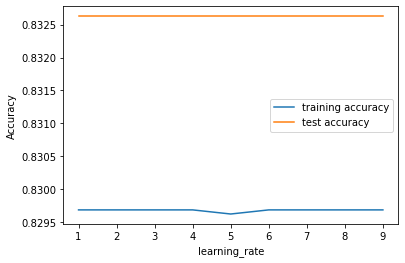

In [70]:

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

In [71]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('CatBoost Classifier',acc_test_cat,f1_score_test_cat,
             recall_score_train_cat,precision_score_train_cat)

In [72]:
#  XGBoost Classifier Model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier()

# fit the model 
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [73]:
#predicting the target value from the model for the samples
y_train_xgb = xgb.predict(X_train)
y_test_xgb = xgb.predict(X_test)

In [74]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_xgb = metrics.accuracy_score(y_train,y_train_xgb)
acc_test_xgb = metrics.accuracy_score(y_test,y_test_xgb)
print("XGBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_xgb))
print()

f1_score_train_xgb = metrics.f1_score(y_train,y_train_xgb)
f1_score_test_xgb = metrics.f1_score(y_test,y_test_xgb)
print("XGBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_xgb))
print("XGBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_xgb))
print()

recall_score_train_xgb = metrics.recall_score(y_train,y_train_xgb)
recall_score_test_xgb = metrics.recall_score(y_test,y_test_xgb)
print("XGBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_xgb))
print("XGBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_train_xgb))
print()

precision_score_train_xgb = metrics.precision_score(y_train,y_train_xgb)
precision_score_test_xgb = metrics.precision_score(y_test,y_test_xgb)
print("XGBoost Classifier : precision on training Data: {:.3f}".format(precision_score_train_xgb))
print("XGBoost Classifier : precision on test Data: {:.3f}".format(precision_score_train_xgb))

XGBoost Classifier : Accuracy on training Data: 0.830
XGBoost Classifier : Accuracy on test Data: 0.833

XGBoost Classifier : f1_score on training Data: 0.795
XGBoost Classifier : f1_score on test Data: 0.803

XGBoost Classifier : Recall on training Data: 0.662
XGBoost Classifier : Recall on test Data: 0.662

XGBoost Classifier : precision on training Data: 0.994
XGBoost Classifier : precision on test Data: 0.994


In [75]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('XGBoost Classifier',acc_test_xgb,f1_score_test_xgb,
             recall_score_train_xgb,precision_score_train_xgb)

In [76]:
# Multi-layer Perceptron Classifier Model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier()
#mlp = GridSearchCV(mlpc, parameter_space)

# fit the model 
mlp.fit(X_train,y_train)

MLPClassifier()

In [77]:
#predicting the target value from the model for the samples
y_train_mlp = mlp.predict(X_train)
y_test_mlp = mlp.predict(X_test)

In [78]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_mlp  = metrics.accuracy_score(y_train,y_train_mlp)
acc_test_mlp = metrics.accuracy_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multi-layer Perceptron : Accuracy on test Data: {:.3f}".format(acc_test_mlp))
print()

f1_score_train_mlp = metrics.f1_score(y_train,y_train_mlp)
f1_score_test_mlp = metrics.f1_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : f1_score on training Data: {:.3f}".format(f1_score_train_mlp))
print("Multi-layer Perceptron : f1_score on test Data: {:.3f}".format(f1_score_train_mlp))
print()

recall_score_train_mlp = metrics.recall_score(y_train,y_train_mlp)
recall_score_test_mlp = metrics.recall_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Recall on training Data: {:.3f}".format(recall_score_train_mlp))
print("Multi-layer Perceptron : Recall on test Data: {:.3f}".format(recall_score_test_mlp))
print()

precision_score_train_mlp = metrics.precision_score(y_train,y_train_mlp)
precision_score_test_mlp = metrics.precision_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : precision on training Data: {:.3f}".format(precision_score_train_mlp))
print("Multi-layer Perceptron : precision on test Data: {:.3f}".format(precision_score_test_mlp))

Multi-layer Perceptron : Accuracy on training Data: 0.830
Multi-layer Perceptron : Accuracy on test Data: 0.832

Multi-layer Perceptron : f1_score on training Data: 0.795
Multi-layer Perceptron : f1_score on test Data: 0.795

Multi-layer Perceptron : Recall on training Data: 0.662
Multi-layer Perceptron : Recall on test Data: 0.672

Multi-layer Perceptron : precision on training Data: 0.994
Multi-layer Perceptron : precision on test Data: 0.994


In [79]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Multi-layer Perceptron',acc_test_mlp,f1_score_test_mlp,
             recall_score_train_mlp,precision_score_train_mlp)

In [80]:
from keras.layers import Input, Dense
from keras.models import Model

input_dim = X_train.shape[1]
encoding_dim = input_dim

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
encoder = Dense(int(encoding_dim-2), activation="relu")(encoder)
code = Dense(int(encoding_dim-4), activation='relu')(encoder)
decoder = Dense(int(encoding_dim-2), activation='relu')(code)
decoder = Dense(encoding_dim, activation='relu')(decoder)
output_layer = Dense(input_dim, activation='sigmoid')(decoder)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.summary()

autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=64, shuffle=True, validation_split=0.2)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense (Dense)               (None, 6)                 42        
                                                                 
 dense_1 (Dense)             (None, 4)                 28        
                                                                 
 dense_2 (Dense)             (None, 2)                 10        
                                                                 
 dense_3 (Dense)             (None, 4)                 12        
                                                                 
 dense_4 (Dense)             (None, 6)                 30        
                                                                 
 dense_5 (Dense)             (None, 6)                 42    

In [81]:
acc_train_auto = autoencoder.evaluate(X_train, X_train)[1]
acc_test_auto = autoencoder.evaluate(X_test, X_test)[1]

print('\nAutoencoder: Accuracy on training Data: {:.3f}' .format(acc_train_auto))
print('Autoencoder: Accuracy on test Data: {:.3f}' .format(acc_test_auto))

250/250 [==============================] - 1s 2ms/step - loss: -34654044.0000 - accuracy: 0.6589

Autoencoder: Accuracy on training Data: 0.661
Autoencoder: Accuracy on test Data: 0.659


In [82]:
from sklearn.ensemble import AdaBoostClassifier

# Create Decision Tree classifer object
clf = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train Decision Tree Classifer
clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [83]:
clf.score(X_train, y_train)

0.82296875

In [84]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.828625


In [85]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.99      0.85      3954
           1       0.98      0.68      0.80      4046

    accuracy                           0.83      8000
   macro avg       0.86      0.83      0.82      8000
weighted avg       0.87      0.83      0.82      8000



<AxesSubplot:>

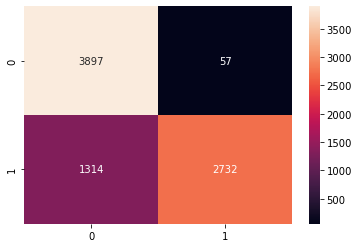

In [86]:
confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt='0.0f')

In [87]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })

In [88]:
# dispalying total result
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Logistic Regression,0.828,0.799,0.660,0.977
1,K-Nearest Neighbors,0.672,0.721,0.843,0.638
2,Support Vector Machine,0.832,0.802,0.664,0.986
3,Naive Bayes Classifier,0.795,0.748,0.580,0.990
4,Decision Tree,0.832,0.802,0.662,0.994
5,Random Forest,0.832,0.802,0.662,0.994
6,Gradient Boosting Classifier,0.833,0.803,0.662,0.994
7,CatBoost Classifier,0.833,0.803,0.662,0.994
8,XGBoost Classifier,0.833,0.803,0.662,0.994
9,Multi-layer Perceptron,0.832,0.802,0.662,0.994


In [89]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)

In [90]:
# dispalying total result
sorted_result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Gradient Boosting Classifier,0.833,0.803,0.662,0.994
1,CatBoost Classifier,0.833,0.803,0.662,0.994
2,XGBoost Classifier,0.833,0.803,0.662,0.994
3,Support Vector Machine,0.832,0.802,0.664,0.986
4,Decision Tree,0.832,0.802,0.662,0.994
5,Random Forest,0.832,0.802,0.662,0.994
6,Multi-layer Perceptron,0.832,0.802,0.662,0.994
7,Logistic Regression,0.828,0.799,0.660,0.977
8,Naive Bayes Classifier,0.795,0.748,0.580,0.990
9,K-Nearest Neighbors,0.672,0.721,0.843,0.638


In [92]:
from sklearn.ensemble import VotingClassifier
model_1 = RandomForestClassifier(n_estimators=10)
model_2 = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)
model_3 =  XGBClassifier()
model_4 = CatBoostClassifier(learning_rate  = 0.1)
model_5 = DecisionTreeClassifier()
ensemble = VotingClassifier(estimators=[('RandomForest', model_1),('Gradientboosting',model_2),
                                        ('xgbclassifier',model_3),('catboost',model_4),
                                        ('DT', model_5)], voting='hard')

In [93]:
import time
ensemble.fit(X_train, y_train)
start_time = time.time()
y_pred_test = ensemble.predict(X_test)
end_time = time.time()
duration = end_time - start_time
print('Time taken by model:', duration, 'seconds')
y_pred_train = ensemble.predict(X_train)

0:	learn: 0.5719038	total: 14.7ms	remaining: 14.7s
1:	learn: 0.4977186	total: 28.5ms	remaining: 14.2s
2:	learn: 0.4553207	total: 41.7ms	remaining: 13.9s
3:	learn: 0.4292240	total: 56.3ms	remaining: 14s
4:	learn: 0.4123118	total: 69.5ms	remaining: 13.8s
5:	learn: 0.3983697	total: 82.2ms	remaining: 13.6s
6:	learn: 0.3895022	total: 94.8ms	remaining: 13.4s
7:	learn: 0.3831044	total: 109ms	remaining: 13.5s
8:	learn: 0.3776164	total: 122ms	remaining: 13.5s
9:	learn: 0.3735999	total: 135ms	remaining: 13.4s
10:	learn: 0.3692923	total: 149ms	remaining: 13.4s
11:	learn: 0.3664128	total: 160ms	remaining: 13.2s
12:	learn: 0.3630891	total: 174ms	remaining: 13.2s
13:	learn: 0.3609229	total: 186ms	remaining: 13.1s
14:	learn: 0.3587107	total: 198ms	remaining: 13s
15:	learn: 0.3569634	total: 217ms	remaining: 13.4s
16:	learn: 0.3551062	total: 236ms	remaining: 13.6s
17:	learn: 0.3536707	total: 253ms	remaining: 13.8s
18:	learn: 0.3526504	total: 271ms	remaining: 14s
19:	learn: 0.3516990	total: 287ms	remain

172:	learn: 0.3438514	total: 2.42s	remaining: 11.6s
173:	learn: 0.3438514	total: 2.43s	remaining: 11.6s
174:	learn: 0.3438514	total: 2.45s	remaining: 11.5s
175:	learn: 0.3438514	total: 2.46s	remaining: 11.5s
176:	learn: 0.3438514	total: 2.47s	remaining: 11.5s
177:	learn: 0.3438514	total: 2.48s	remaining: 11.5s
178:	learn: 0.3438514	total: 2.49s	remaining: 11.4s
179:	learn: 0.3438514	total: 2.5s	remaining: 11.4s
180:	learn: 0.3438514	total: 2.51s	remaining: 11.4s
181:	learn: 0.3438514	total: 2.52s	remaining: 11.3s
182:	learn: 0.3438514	total: 2.54s	remaining: 11.3s
183:	learn: 0.3438514	total: 2.55s	remaining: 11.3s
184:	learn: 0.3438514	total: 2.56s	remaining: 11.3s
185:	learn: 0.3438514	total: 2.57s	remaining: 11.3s
186:	learn: 0.3438514	total: 2.58s	remaining: 11.2s
187:	learn: 0.3438514	total: 2.59s	remaining: 11.2s
188:	learn: 0.3438514	total: 2.6s	remaining: 11.2s
189:	learn: 0.3438514	total: 2.62s	remaining: 11.2s
190:	learn: 0.3438514	total: 2.63s	remaining: 11.1s
191:	learn: 0.

342:	learn: 0.3438514	total: 4.34s	remaining: 8.32s
343:	learn: 0.3438514	total: 4.36s	remaining: 8.3s
344:	learn: 0.3438514	total: 4.37s	remaining: 8.29s
345:	learn: 0.3438514	total: 4.38s	remaining: 8.27s
346:	learn: 0.3438514	total: 4.39s	remaining: 8.26s
347:	learn: 0.3438514	total: 4.4s	remaining: 8.24s
348:	learn: 0.3438514	total: 4.41s	remaining: 8.22s
349:	learn: 0.3438514	total: 4.42s	remaining: 8.21s
350:	learn: 0.3438514	total: 4.43s	remaining: 8.19s
351:	learn: 0.3438514	total: 4.44s	remaining: 8.18s
352:	learn: 0.3438514	total: 4.45s	remaining: 8.16s
353:	learn: 0.3438514	total: 4.46s	remaining: 8.14s
354:	learn: 0.3438514	total: 4.47s	remaining: 8.12s
355:	learn: 0.3438514	total: 4.48s	remaining: 8.11s
356:	learn: 0.3438514	total: 4.49s	remaining: 8.09s
357:	learn: 0.3438514	total: 4.5s	remaining: 8.07s
358:	learn: 0.3438514	total: 4.51s	remaining: 8.05s
359:	learn: 0.3438514	total: 4.52s	remaining: 8.04s
360:	learn: 0.3438514	total: 4.54s	remaining: 8.03s
361:	learn: 0.3

501:	learn: 0.3438514	total: 6.1s	remaining: 6.05s
502:	learn: 0.3438514	total: 6.12s	remaining: 6.04s
503:	learn: 0.3438514	total: 6.15s	remaining: 6.06s
504:	learn: 0.3438514	total: 6.17s	remaining: 6.05s
505:	learn: 0.3438514	total: 6.18s	remaining: 6.04s
506:	learn: 0.3438514	total: 6.19s	remaining: 6.02s
507:	learn: 0.3438514	total: 6.2s	remaining: 6.01s
508:	learn: 0.3438514	total: 6.21s	remaining: 6s
509:	learn: 0.3438514	total: 6.23s	remaining: 5.98s
510:	learn: 0.3438514	total: 6.24s	remaining: 5.97s
511:	learn: 0.3438514	total: 6.25s	remaining: 5.96s
512:	learn: 0.3438514	total: 6.26s	remaining: 5.94s
513:	learn: 0.3438514	total: 6.27s	remaining: 5.93s
514:	learn: 0.3438514	total: 6.29s	remaining: 5.92s
515:	learn: 0.3438514	total: 6.3s	remaining: 5.91s
516:	learn: 0.3438514	total: 6.31s	remaining: 5.89s
517:	learn: 0.3438514	total: 6.32s	remaining: 5.88s
518:	learn: 0.3438514	total: 6.33s	remaining: 5.87s
519:	learn: 0.3438514	total: 6.34s	remaining: 5.86s
520:	learn: 0.3438

662:	learn: 0.3438514	total: 8.05s	remaining: 4.09s
663:	learn: 0.3438514	total: 8.06s	remaining: 4.08s
664:	learn: 0.3438514	total: 8.07s	remaining: 4.07s
665:	learn: 0.3438514	total: 8.08s	remaining: 4.05s
666:	learn: 0.3438514	total: 8.09s	remaining: 4.04s
667:	learn: 0.3438514	total: 8.1s	remaining: 4.03s
668:	learn: 0.3438514	total: 8.12s	remaining: 4.01s
669:	learn: 0.3438514	total: 8.13s	remaining: 4s
670:	learn: 0.3438514	total: 8.14s	remaining: 3.99s
671:	learn: 0.3438514	total: 8.15s	remaining: 3.98s
672:	learn: 0.3438514	total: 8.16s	remaining: 3.96s
673:	learn: 0.3438514	total: 8.17s	remaining: 3.95s
674:	learn: 0.3438514	total: 8.18s	remaining: 3.94s
675:	learn: 0.3438514	total: 8.19s	remaining: 3.93s
676:	learn: 0.3438514	total: 8.2s	remaining: 3.91s
677:	learn: 0.3438514	total: 8.22s	remaining: 3.9s
678:	learn: 0.3438514	total: 8.23s	remaining: 3.89s
679:	learn: 0.3438514	total: 8.24s	remaining: 3.88s
680:	learn: 0.3438514	total: 8.25s	remaining: 3.87s
681:	learn: 0.3438

837:	learn: 0.3438514	total: 9.99s	remaining: 1.93s
838:	learn: 0.3438514	total: 10s	remaining: 1.92s
839:	learn: 0.3438514	total: 10s	remaining: 1.91s
840:	learn: 0.3438514	total: 10s	remaining: 1.9s
841:	learn: 0.3438514	total: 10s	remaining: 1.88s
842:	learn: 0.3438514	total: 10.1s	remaining: 1.87s
843:	learn: 0.3438514	total: 10.1s	remaining: 1.86s
844:	learn: 0.3438514	total: 10.1s	remaining: 1.85s
845:	learn: 0.3438514	total: 10.1s	remaining: 1.83s
846:	learn: 0.3438514	total: 10.1s	remaining: 1.82s
847:	learn: 0.3438514	total: 10.1s	remaining: 1.81s
848:	learn: 0.3438514	total: 10.1s	remaining: 1.8s
849:	learn: 0.3438514	total: 10.1s	remaining: 1.79s
850:	learn: 0.3438514	total: 10.1s	remaining: 1.77s
851:	learn: 0.3438514	total: 10.1s	remaining: 1.76s
852:	learn: 0.3438514	total: 10.2s	remaining: 1.75s
853:	learn: 0.3438514	total: 10.2s	remaining: 1.74s
854:	learn: 0.3438514	total: 10.2s	remaining: 1.73s
855:	learn: 0.3438514	total: 10.2s	remaining: 1.71s
856:	learn: 0.3438514	

Time taken by model: 0.149918794631958 seconds


In [95]:
from sklearn.metrics import accuracy_score
train_accurry = accuracy_score(y_pred_train, y_train)
test_accurry = accuracy_score(y_pred_test, y_test)
print('Accuracy for train dataset: ', train_accurry)
print('Accuracy for test dataset', test_accurry)

Accuracy for train dataset:  0.8296875
Accuracy for test dataset 0.832625


In [96]:
# import pickle
# filename = 'finalized_model.sav'
# pickle.dump(ensemble, open(filename, 'wb'))

In [97]:
# #  XGBoost Classifier Model
# from xgboost import XGBClassifier

# # instantiate the model
# gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# # fit the model 
# gbc.fit(X_train,y_train)

In [98]:
# import os
# import pickle

# if not os.path.exists('pickle'):
#     os.makedirs('pickle')

# # dump information to that file
# pickle.dump(gbc, open('pickle/model.pkl', 'wb'))

In [99]:
# current_directory = os.getcwd()

In [100]:
# #checking the feature improtance in the model
# plt.figure(figsize=(9,7))
# n_features = X_train.shape[1]
# plt.barh(range(n_features), gbc.feature_importances_, align='center')
# plt.yticks(np.arange(n_features), X_train.columns)
# plt.title("Feature importances using permutation on full model")
# plt.xlabel("Feature importance")
# plt.ylabel("Feature")
# plt.show()